In this notebook, I am going to use Chanel's fashion show image from 2018 to 2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import cm
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from PIL import Image
import cv2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import webcolors
from webcolors import (css3_hex_to_names,hex_to_rgb,rgb_to_name,hex_to_name)
from scipy.spatial import KDTree
from collections import Counter

In [2]:
df = pd.read_csv('./colors_chanel_rgba.csv')

## match each rgb to a color name

In [3]:
#https://medium.com/codex/rgb-to-color-names-in-python-the-robust-way-ec4a9d97a01f

# convert rgb to color names
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = css3_hex_to_names
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

In [4]:
df.head()

brand  year  season  num    r    g    b    a
0  chanel  2021  spring   48  206  167  150  253
1  chanel  2021  spring   48   17   25   33  253
2  chanel  2021  spring   48  178  136  120  253
3  chanel  2021  spring   48  160  118  104  252
4  chanel  2021  spring   58  202  175  166  253

In [5]:
# convert the each rgb to color name

color_name=[]
for i in range(0,len(df)):
    closest_name=convert_rgb_to_names((df.r[i],df.g[i],df.b[i]))
    color_name.append(closest_name)

In [6]:
df['color_name']=color_name

In [7]:
df.head()

brand  year  season  num    r    g    b    a color_name
0  chanel  2021  spring   48  206  167  150  253        tan
1  chanel  2021  spring   48   17   25   33  253      black
2  chanel  2021  spring   48  178  136  120  253  rosybrown
3  chanel  2021  spring   48  160  118  104  252       grey
4  chanel  2021  spring   58  202  175  166  253        tan

In [8]:
# create a dataframe for the color count, plot later

color_count=pd.DataFrame((df.groupby('color_name')['color_name'].count()))
color_count

color_name
color_name                
antiquewhite            10
beige                    2
bisque                   6
black                  322
blanchedalmond           1
...                    ...
tan                    277
teal                     7
thistle                  6
tomato                   7
wheat                   35

[63 rows x 1 columns]

In [9]:
# rename the column
color_count.rename(columns={'color_name':'count'},inplace=True)

In [10]:
# sort dataframe by counts
color_count=color_count.sort_values('count',ascending=False)

In [11]:
color_count.head()

count
color_name       
black         322
tan           277
dimgrey       265
gainsboro     259
darkgrey      239

In [12]:
# the tope 10 popular colors
data=color_count[:10]
data

count
color_name          
black            322
tan              277
dimgrey          265
gainsboro        259
darkgrey         239
darkslategrey    180
rosybrown        100
grey              91
indianred         59
lightgrey         41

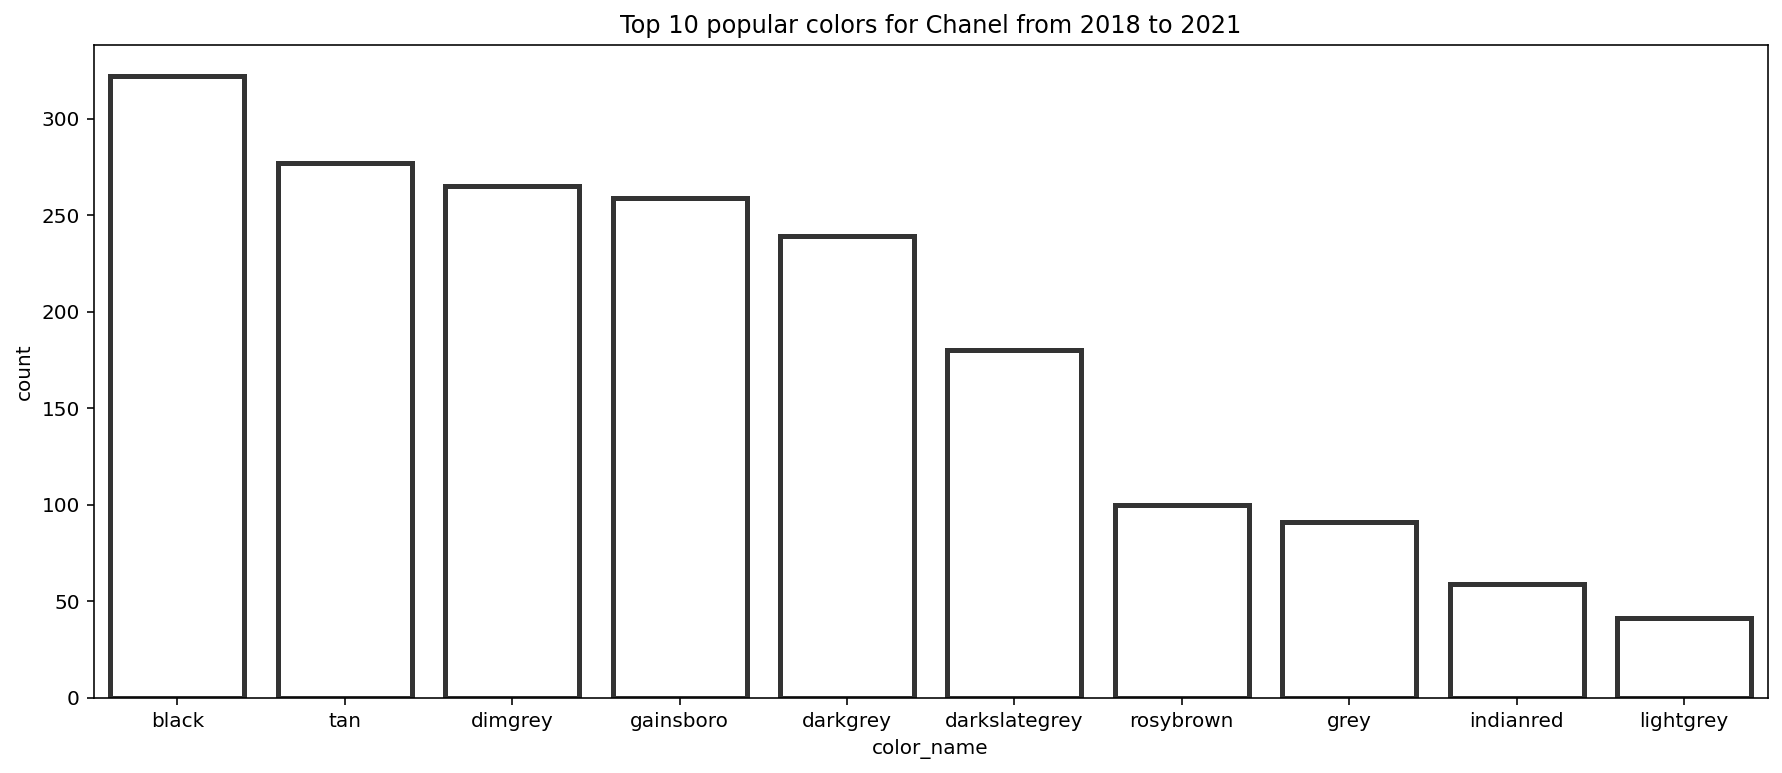

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(data=data,x=data.index,y=data['count'],linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")
plt.title('Top 10 popular colors for Chanel from 2018 to 2021');

## Do Kmeans on all the rgb columns, and get the top popular colors

In [14]:
df.head()

brand  year  season  num    r    g    b    a color_name
0  chanel  2021  spring   48  206  167  150  253        tan
1  chanel  2021  spring   48   17   25   33  253      black
2  chanel  2021  spring   48  178  136  120  253  rosybrown
3  chanel  2021  spring   48  160  118  104  252       grey
4  chanel  2021  spring   58  202  175  166  253        tan

In [15]:
x=df[['r','g','b','a']]
sc=StandardScaler()
z=sc.fit_transform(x)

In [16]:
# initiate the k means cluster
km= KMeans(n_clusters=10)

In [17]:
#fit on scaled data
km.fit(z)

KMeans(n_clusters=10)

In [18]:
# Check out centroids
km.cluster_centers_

array([[  0.98013069,   0.72949669,   0.55699412,   0.16546019],
       [ -1.41931789,  -1.37829584,  -1.33660488,   0.11445707],
       [ -0.72568415,  -0.54224893,  -0.51602689, -14.45687582],
       [ -0.72928307,  -0.59857037,  -0.55782564,   0.02705246],
       [  1.07355959,   1.39875506,   1.49668752,   0.1418998 ],
       [  0.79289516,  -1.23684608,  -0.96711654,   0.19163626],
       [  0.2853054 ,   0.51121348,   0.58157832,  -0.14699373],
       [ -0.72069898,  -0.56648002,  -0.5819407 ,  -8.84102456],
       [  0.30040744,  -0.14488244,  -0.37013526,   0.09812472],
       [ -1.35604077,  -0.18428972,   0.60750387,   0.18233052]])

In [19]:
# convert it back to the original representation
centroids=sc.inverse_transform(km.cluster_centers_)
centroids

array([[214.79846939, 173.9744898 , 158.87244898, 252.94897959],
       [ 38.31557377,  34.79508197,  38.21311475, 252.42827869],
       [ 89.33333333,  90.        ,  90.5       , 103.66666667],
       [ 89.06862745,  86.28104575,  87.83660131, 251.53594771],
       [221.67029973, 218.16621253, 218.7493188 , 252.70844687],
       [201.02702703,  44.13513514,  61.75675676, 253.21621622],
       [163.69306931, 159.56105611, 160.43894389, 249.75907591],
       [ 89.7       ,  88.4       ,  86.3       , 161.        ],
       [164.80384615, 116.23846154,  99.79615385, 252.26153846],
       [ 42.96969697, 113.63636364, 162.09090909, 253.12121212]])

In [20]:
# convert the float to interger
centroids=centroids.astype(int)
centroids

array([[214, 173, 158, 252],
       [ 38,  34,  38, 252],
       [ 89,  90,  90, 103],
       [ 89,  86,  87, 251],
       [221, 218, 218, 252],
       [201,  44,  61, 253],
       [163, 159, 160, 249],
       [ 89,  88,  86, 160],
       [164, 116,  99, 252],
       [ 42, 113, 162, 253]])

In [21]:
centroids[0][:3]

array([214, 173, 158])

In [22]:
convert_rgb_to_names(centroids[0][:3])

'tan'

In [23]:
# get color name
color_name_k=[]
for i in range(0,len(centroids)):
    closest_name_k=convert_rgb_to_names(centroids[i][:3])
    color_name_k.append(closest_name_k)

In [24]:
color_name_k

['tan',
 'darkslategrey',
 'dimgrey',
 'dimgrey',
 'gainsboro',
 'crimson',
 'darkgrey',
 'dimgrey',
 'grey',
 'steelblue']

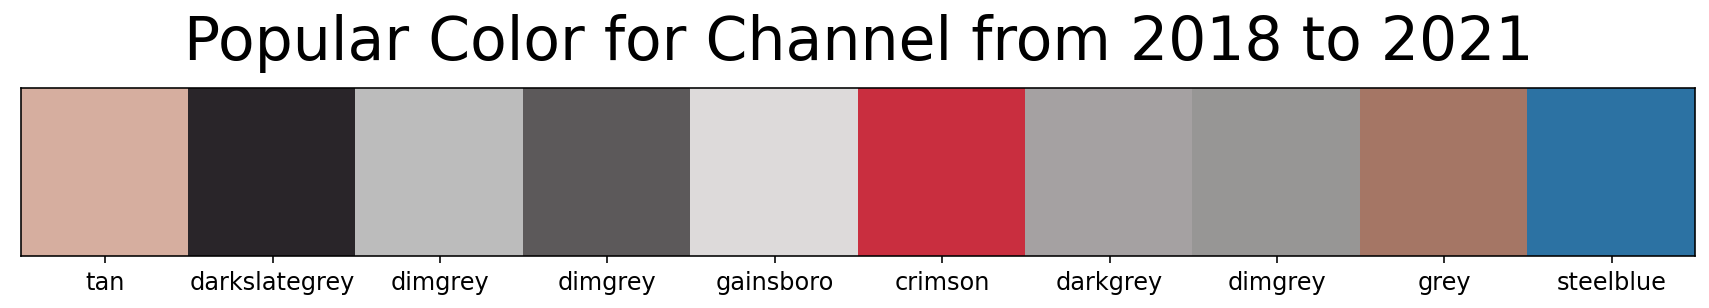

In [25]:
plt.figure(figsize=(15,8))
a=plt.imshow([centroids])
plt.title('Popular Color for Channel from 2018 to 2021',size=30,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,len(color_name_k)),color_name_k,size=12);

In [26]:
df.head()

brand  year  season  num    r    g    b    a color_name
0  chanel  2021  spring   48  206  167  150  253        tan
1  chanel  2021  spring   48   17   25   33  253      black
2  chanel  2021  spring   48  178  136  120  253  rosybrown
3  chanel  2021  spring   48  160  118  104  252       grey
4  chanel  2021  spring   58  202  175  166  253        tan

In [27]:
x=df.loc[df['year']==2021,['r','g','b','a']]
sc=StandardScaler()
z=sc.fit_transform(x)

# initiate the k means cluster
km= KMeans(n_clusters=10)

#fit on scaled data
km.fit(z)

# Check out centroids
km.cluster_centers_

# convert it back to the original representation
centroids=sc.inverse_transform(km.cluster_centers_)

# convert the float to interger
centroids=centroids.astype(int)

color_name_k=[]
for i in range(0,len(centroids)):
    closest_name_k=convert_rgb_to_names(centroids[i][:3])
    color_name_k.append(closest_name_k)

In [28]:
centroids

array([[168, 155, 155, 250],
       [147,  22,  37, 252],
       [174, 160, 158, 232],
       [222, 208, 215, 253],
       [162, 118, 103, 252],
       [125, 114, 114, 244],
       [ 27,  28,  34, 252],
       [200, 164, 154, 253],
       [211, 212, 215, 247],
       [ 89,  84,  91, 252]])

In [29]:
km.labels_

array([7, 6, 4, 4, 7, 0, 3, 4, 7, 9, 4, 6, 7, 4, 4, 6, 9, 3, 4, 6, 7, 4,
       1, 6, 4, 4, 9, 6, 6, 3, 7, 4, 3, 4, 3, 7, 3, 4, 0, 6, 1, 4, 1, 1,
       7, 4, 0, 6, 4, 3, 7, 4, 7, 3, 4, 4, 7, 0, 3, 4, 7, 4, 4, 6, 7, 4,
       9, 6, 9, 4, 4, 6, 4, 7, 4, 6, 0, 3, 7, 4, 4, 6, 4, 1, 7, 6, 3, 0,
       9, 9, 7, 6, 3, 7, 4, 4, 0, 4, 6, 3, 9, 6, 7, 4, 9, 6, 7, 6, 3, 7,
       0, 4, 0, 4, 3, 6, 7, 4, 4, 6, 7, 4, 6, 3, 4, 6, 7, 0, 7, 5, 5, 6,
       7, 6, 3, 9, 0, 4, 9, 6, 7, 6, 0, 9, 7, 7, 4, 9, 3, 7, 0, 6, 4, 7,
       4, 6, 4, 9, 7, 6, 7, 4, 6, 3, 7, 4, 3, 6, 7, 3, 4, 6, 3, 7, 0, 9,
       3, 0, 9, 6, 6, 3, 7, 0, 6, 3, 0, 6, 3, 5, 6, 8, 5, 4, 9, 3, 0, 4,
       7, 9, 6, 7, 7, 3, 3, 4, 4, 3, 4, 6, 4, 8, 2, 6, 4, 3, 7, 9, 6, 0,
       9, 3, 6, 7, 6, 1, 1, 7, 6, 3, 4, 7, 4, 3, 0, 7, 4, 0, 6, 8, 7, 4,
       6, 9, 6, 7, 9, 3, 7, 0, 6, 8, 6, 0, 2, 9, 7, 7, 6, 3, 4, 7, 0, 3,
       9, 7, 6, 7, 0, 5, 6, 3, 7, 9, 6, 7, 0, 9, 6], dtype=int32)

In [30]:
color_name_k

['darkgrey',
 'brown',
 'darkgrey',
 'lightgrey',
 'grey',
 'grey',
 'black',
 'tan',
 'lightgrey',
 'dimgrey']

In [31]:
Counter(km.labels_).keys()

dict_keys([7, 6, 4, 0, 3, 9, 1, 5, 8, 2])

In [32]:
Counter(km.labels_).values() # counts the elements' frequency

dict_values([55, 56, 60, 26, 38, 26, 7, 5, 4, 2])

In [33]:
[i for i in zip(color_name_k,Counter(km.labels_).values())]

[('darkgrey', 55),
 ('brown', 56),
 ('darkgrey', 60),
 ('lightgrey', 26),
 ('grey', 38),
 ('grey', 26),
 ('black', 7),
 ('tan', 5),
 ('lightgrey', 4),
 ('dimgrey', 2)]

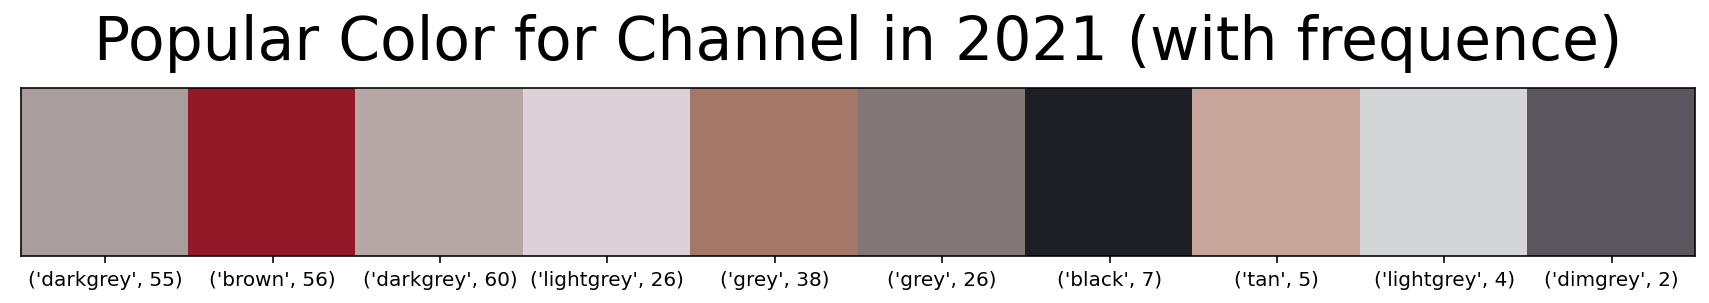

In [34]:
plt.figure(figsize=(15,8))
a=plt.imshow([centroids])
plt.title('Popular Color for Channel in 2021 (with frequence)',size=30,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,len(color_name_k)),
           [i for i in zip(color_name_k,Counter(km.labels_).values())],size=10);

# create a function to find out the popular color

In [35]:
def popular_color(x,n):

    #x=df.loc[df['year']==2021,['r','g','b','a']]
    sc=StandardScaler()
    z=sc.fit_transform(x)

    # initiate the k means cluster
    km= KMeans(n_clusters=n)

    #fit on scaled data
    km.fit(z)

    # Check out centroids
    km.cluster_centers_

    # convert it back to the original representation
    centroids=sc.inverse_transform(km.cluster_centers_)

    # convert the float to interger
    centroids=centroids.astype(int)

    color_name_k=[]
    for i in range(0,len(centroids)):
        closest_name_k=convert_rgb_to_names(centroids[i][:3])
        color_name_k.append(closest_name_k)
    
    color_frequence=Counter(km.labels_).values()
    
    return centroids, color_name_k,color_frequence

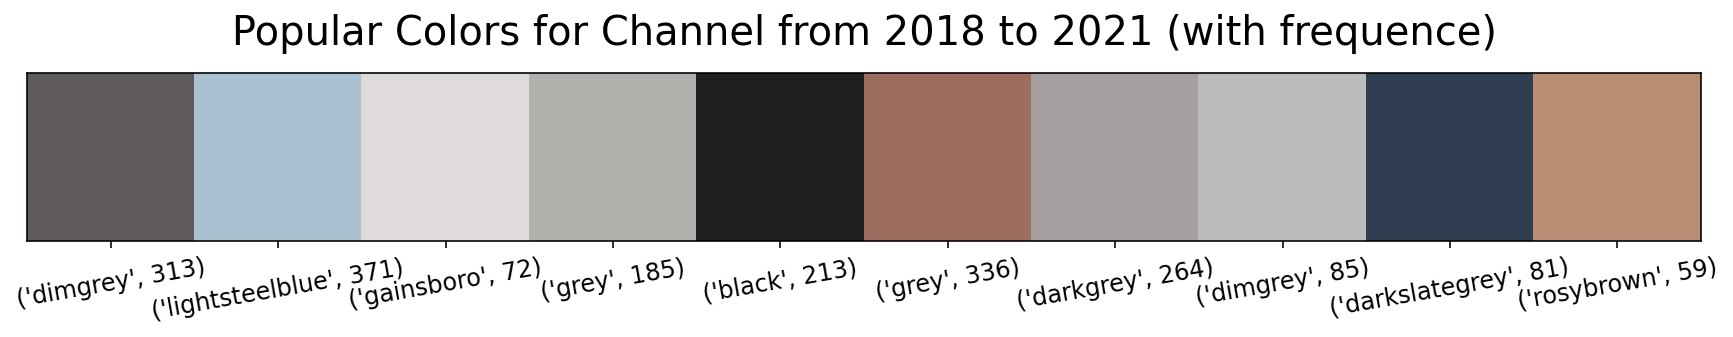

In [36]:
x=df[['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])

plt.title('Popular Colors for Channel from 2018 to 2021 (with frequence)',size=20,y=1.1)

a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

plt.savefig('./plots/popular_colors_channel_2018_2021',transparent=True)

In [76]:
def plot(x,n,title,target_dir):

    centroids,color_name_k,color_frequence=popular_color(x,n)

    plt.figure(figsize=(15,8))
    a=plt.imshow([centroids[:10]])

    plt.title(title,size=20,y=1.1)

    a.axes.get_yaxis().set_visible(False)
    plt.xticks(range(0,int((len(color_name_k)/2))),
               [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);
    
    plt.savefig(target_dir,transparent=True)

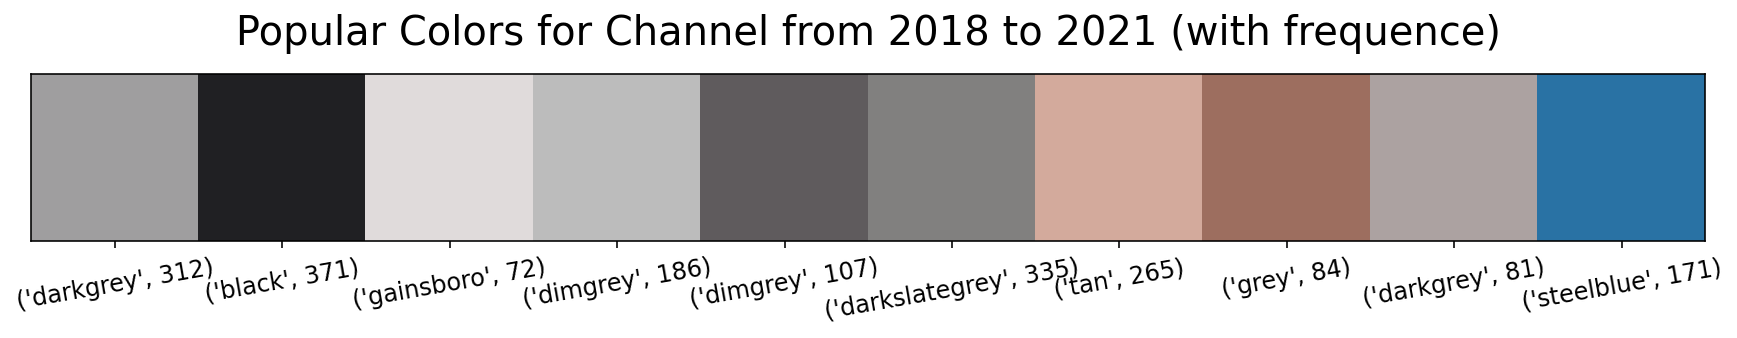

In [79]:
x=df[['r','g','b','a']]
n=20
title='Popular Colors for Channel from 2018 to 2021 (with frequence)'
target_dir='./plots/popular_colors_channel_2018_2021'
plot(x,n,title,target_dir);

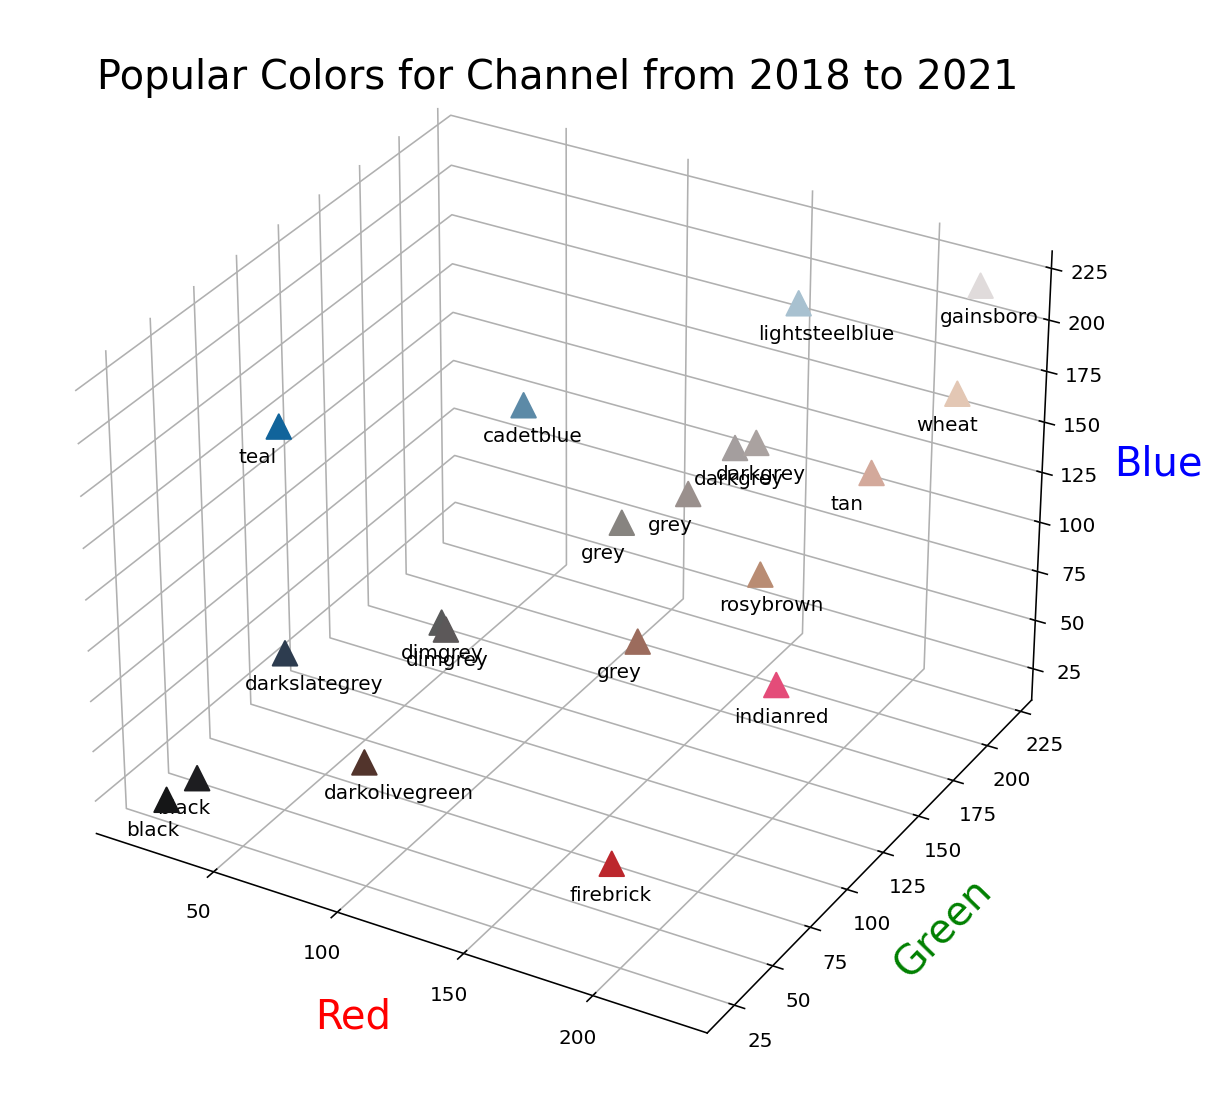

In [37]:
# x=df[['r','g','b','a']]
# centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel from 2018 to 2021',size=20,y=1)

axis.set_xlabel("Red",size=20)
axis.set_ylabel("Green",size=20)
axis.set_zlabel("Blue",size=20)

axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

axis.xaxis.label.set_color('red')
axis.yaxis.label.set_color('green')
axis.zaxis.label.set_color('blue')

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))
    
fig.savefig('./plots/popular_colors_channel_2018_2021_3d',transparent=True)

In [81]:
def plot_2(x,n,title,title_3d,target_dir,target_dir_3d):
    
    # plot 1
    centroids,color_name_k,color_frequence=popular_color(x,n)

    plt.figure(figsize=(15,8))
    a=plt.imshow([centroids[:10]])

    plt.title(title,size=20,y=1.1)

    a.axes.get_yaxis().set_visible(False)
    plt.xticks(range(0,int((len(color_name_k)/2))),
               [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);
    
    plt.savefig(target_dir,transparent=True)
    
    # plot 2
    centroids_df=pd.DataFrame(centroids)

    fig=plt.figure(figsize=(10,10))
    axis = fig.add_subplot(1,1,1,projection='3d')

    axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
                c=centroids/255.0,marker='^',alpha=1,s=150)

    plt.title(title_3d,size=20,y=1)

    axis.set_xlabel("Red",size=20)
    axis.set_ylabel("Green",size=20)
    axis.set_zlabel("Blue",size=20)

    axis.xaxis.labelpad=10
    axis.yaxis.labelpad=10
    axis.zaxis.labelpad=15

    axis.xaxis.label.set_color('red')
    axis.yaxis.label.set_color('green')
    axis.zaxis.label.set_color('blue')

    #change the background to white
    axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    for i in range(len(centroids_df)):
        x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
        axis.scatter(x,y,z,alpha=0)
        axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))
    
    fig.savefig(target_dir_3d,transparent=True)

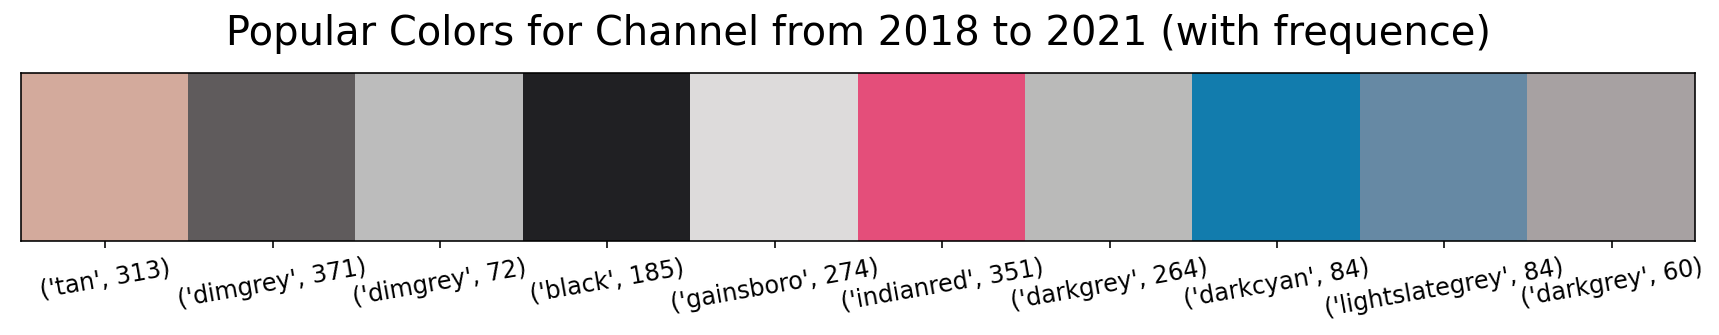

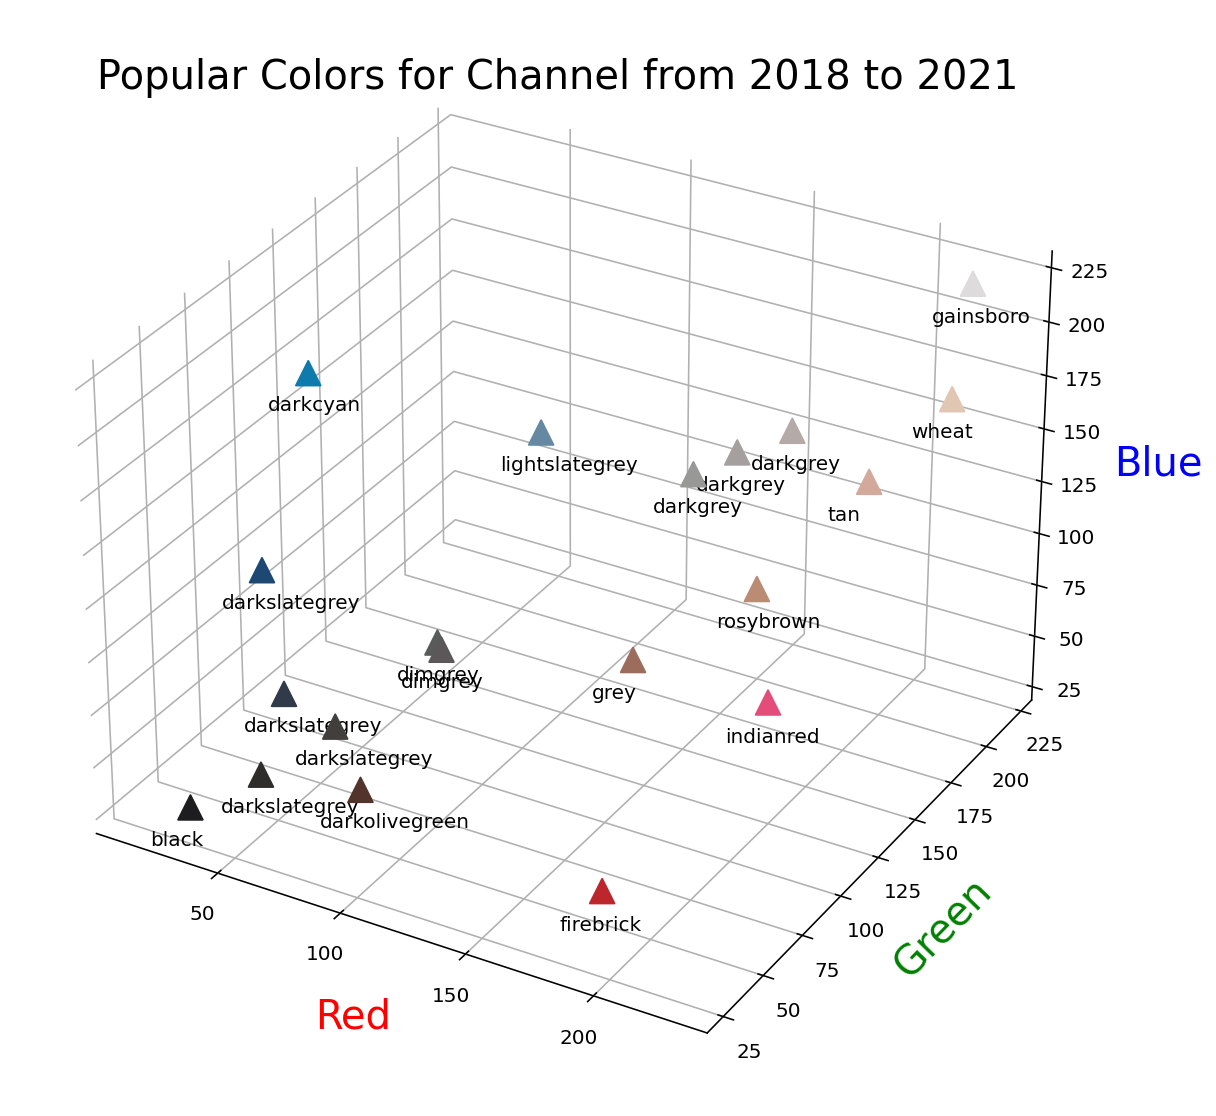

In [82]:
x=df[['r','g','b','a']]
n=20
title='Popular Colors for Channel from 2018 to 2021 (with frequence)'
title_3d='Popular Colors for Channel from 2018 to 2021'
target_dir='./plots/popular_colors_channel_2018_2021'
target_dir_3d='./plots/popular_colors_channel_2018_2021_3d'
plot_2(x,n,title,title_3d,target_dir,target_dir_3d);

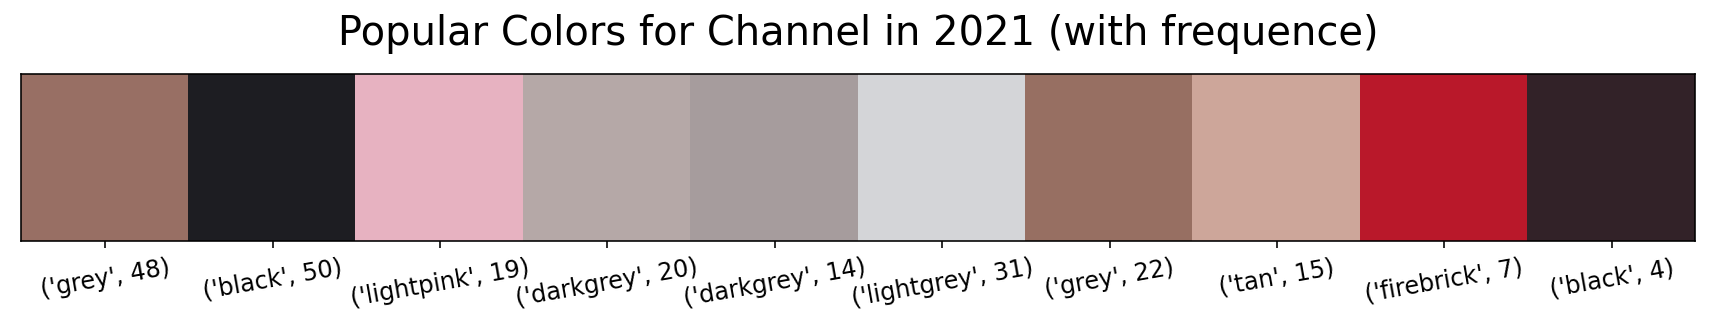

In [38]:
x=df.loc[df['year']==2021,['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel in 2021 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

plt.savefig('./plots/popular_colors_channel_2021',transparent=True)

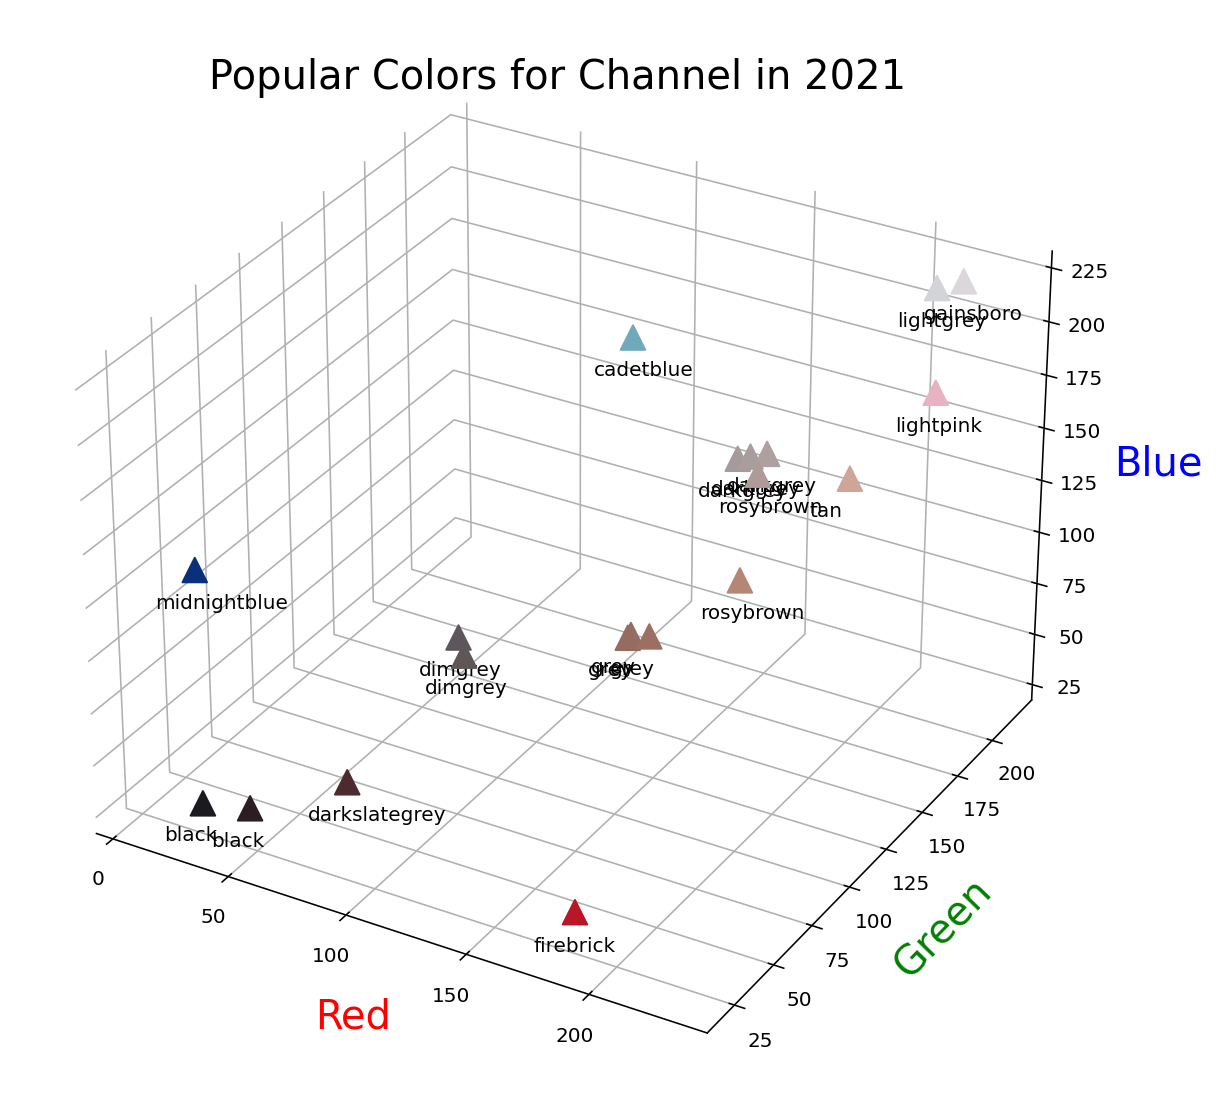

In [39]:
# x=df.loc[df['year']==2021,['r','g','b','a']]
# centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel in 2021',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))
    
plt.savefig('./plots/popular_colors_channel_2021_3d',transparent=True)

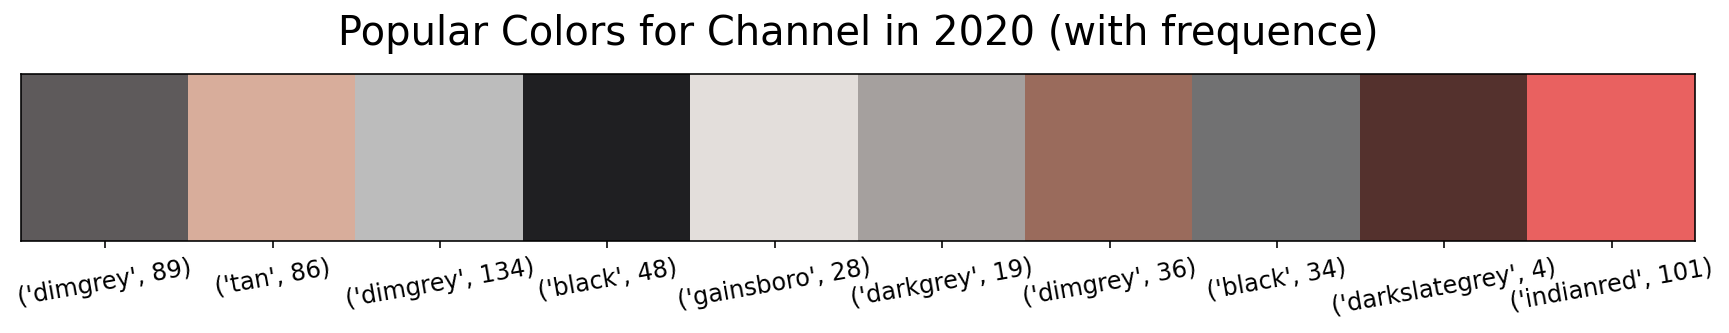

In [40]:
x=df.loc[df['year']==2020,['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel in 2020 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

plt.savefig('./plots/popular_colors_channel_2020',transparent=True)

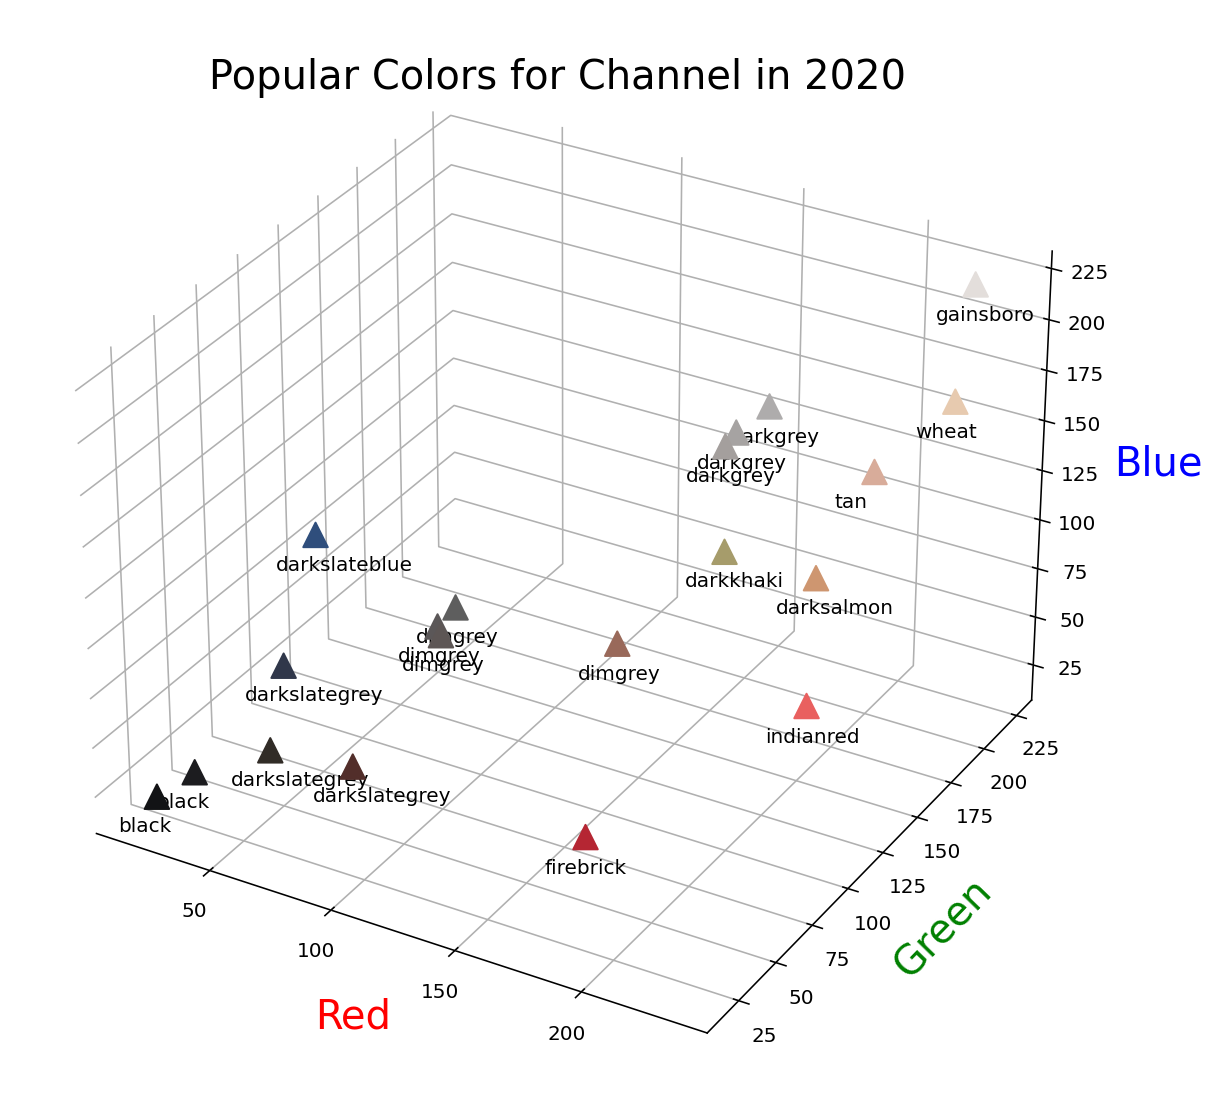

In [41]:
# x=df.loc[df['year']==2020,['r','g','b','a']]
# centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel in 2020',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))
    
plt.savefig('./plots/popular_colors_channel_2020_3d',transparent=True)

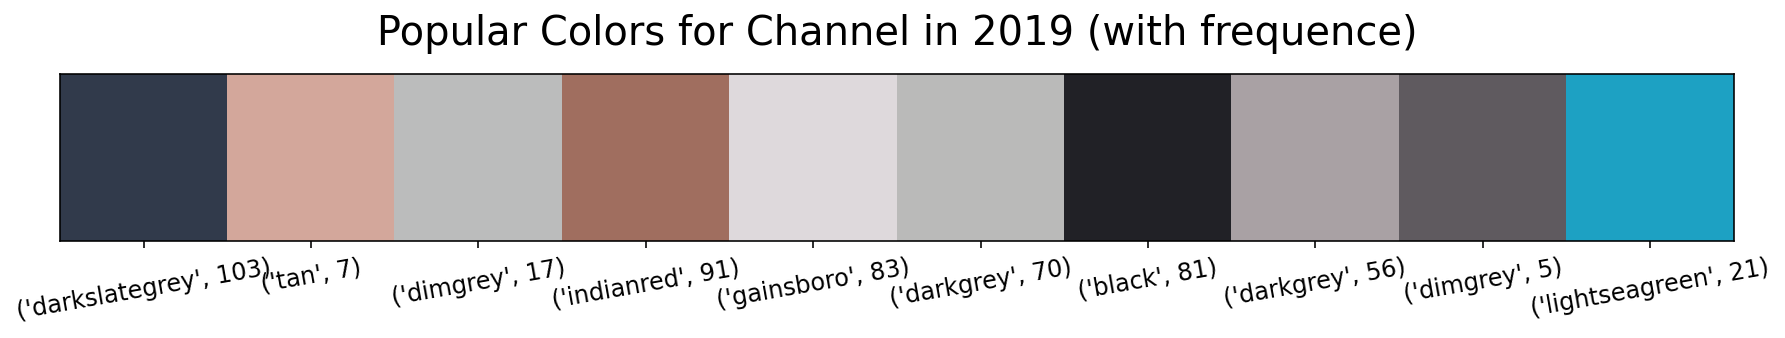

In [42]:
x=df.loc[df['year']==2019,['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel in 2019 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

plt.savefig('./plots/popular_colors_channel_2019',transparent=True)

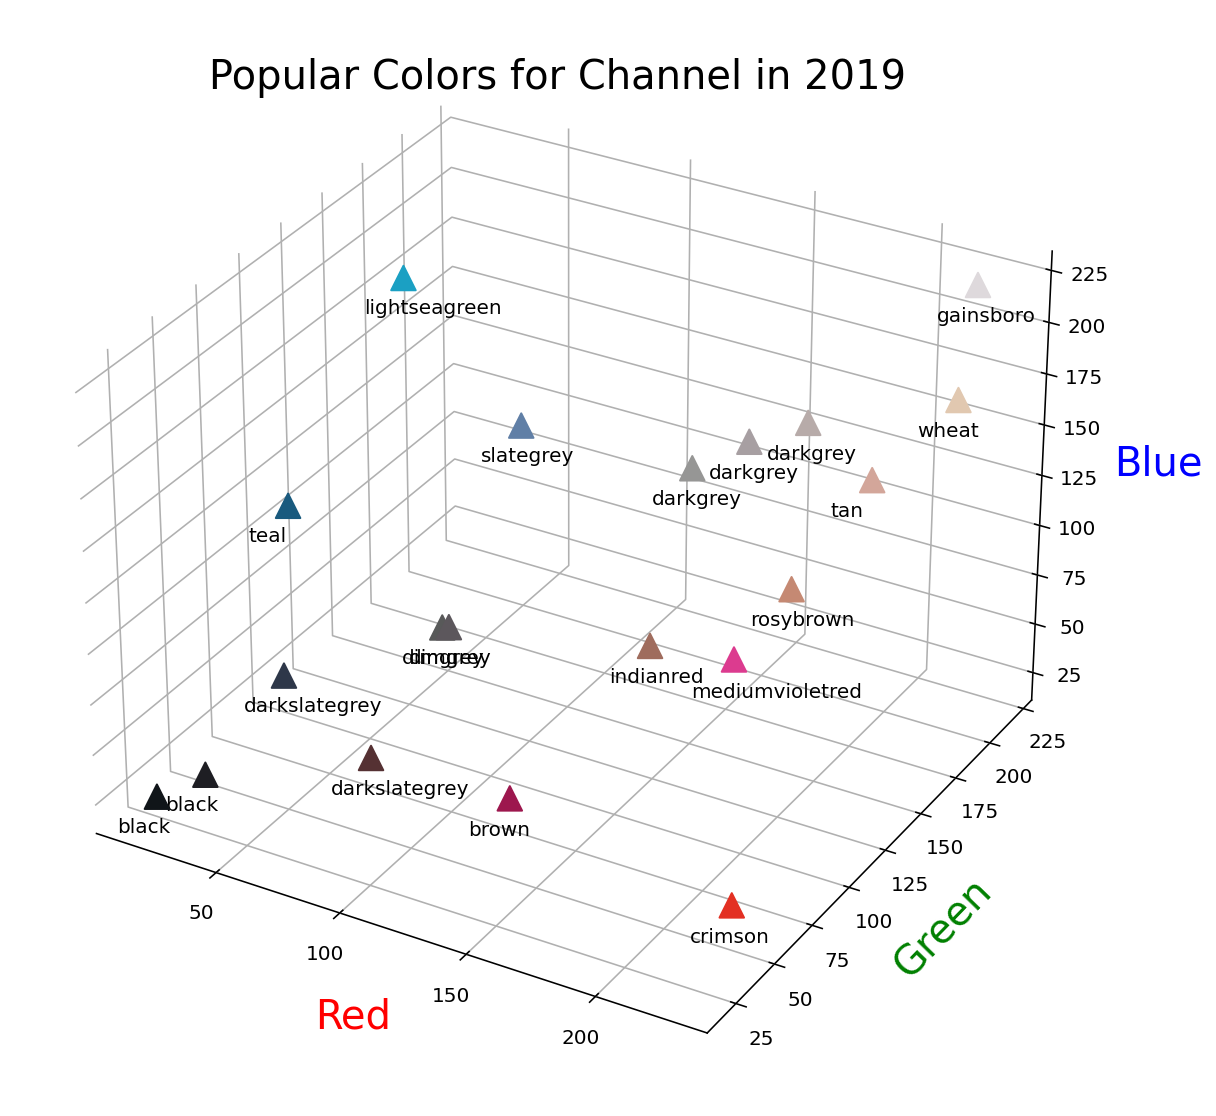

In [43]:
# x=df.loc[df['year']==2019,['r','g','b','a']]
# centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel in 2019',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))
    
plt.savefig('./plots/popular_colors_channel_2019_3d',transparent=True)

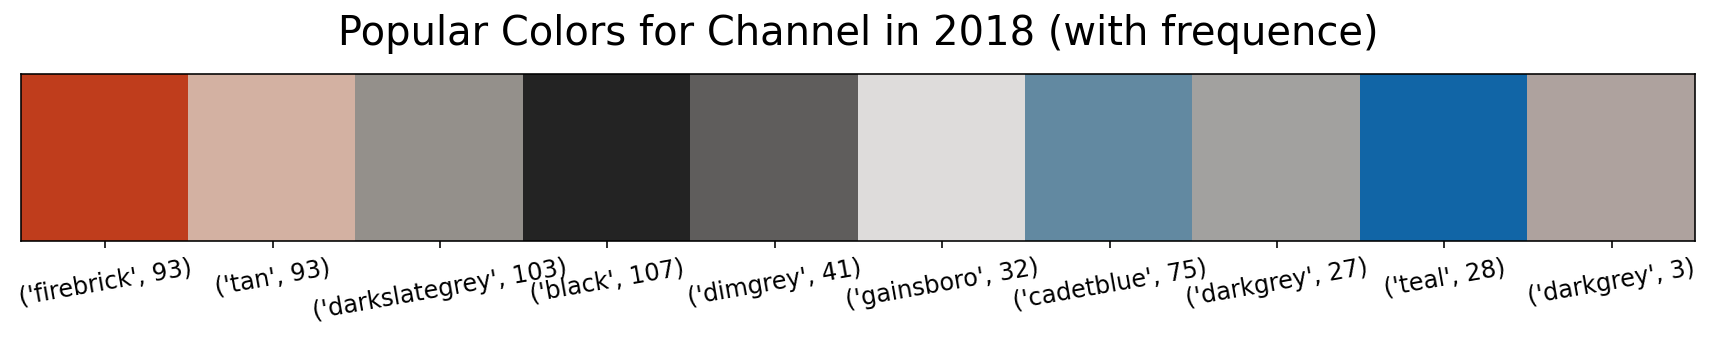

In [44]:
x=df.loc[df['year']==2018,['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel in 2018 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

plt.savefig('./plots/popular_colors_channel_2018',transparent=True)

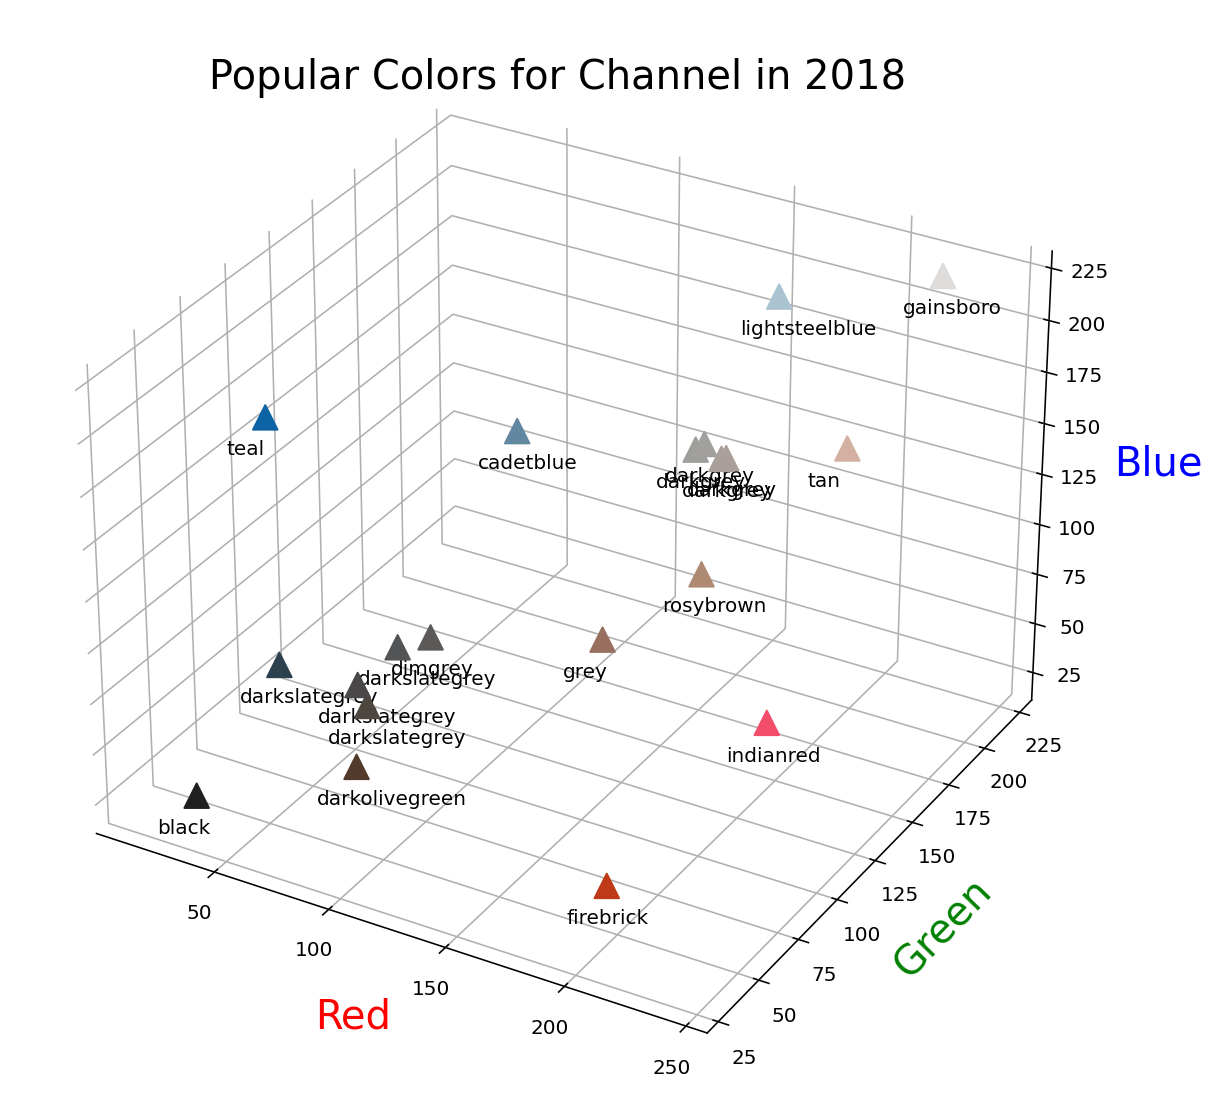

In [45]:
# x=df.loc[df['year']==2018,['r','g','b','a']]
# centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel in 2018',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))
    
plt.savefig('./plots/popular_colors_channel_2018_3d',transparent=True)

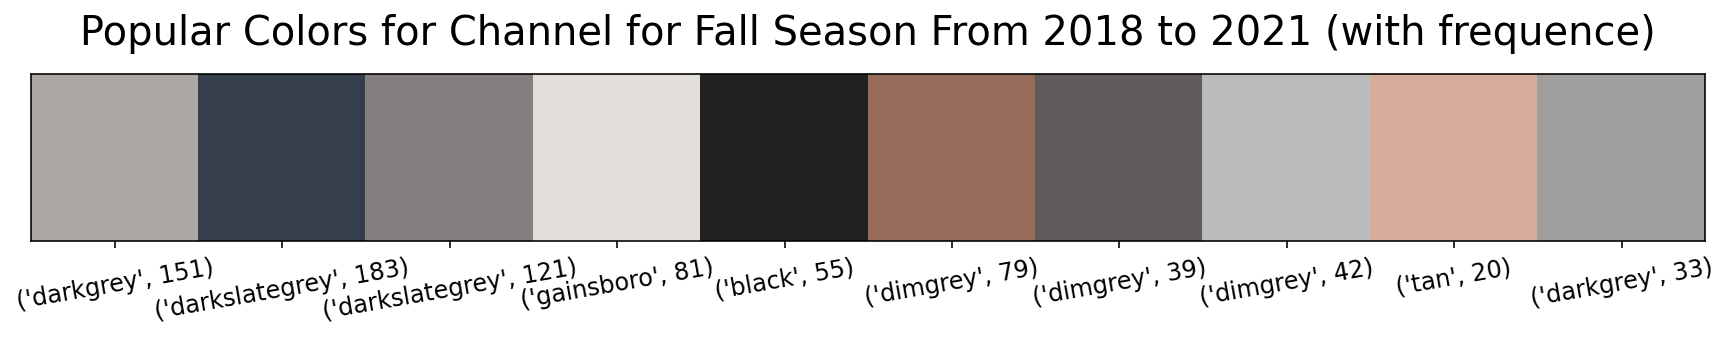

In [46]:
x=df.loc[df['season']=='fall',['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel for Fall Season From 2018 to 2021 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

plt.savefig('./plots/popular_colors_channel_fall_2018_2021',transparent=True)

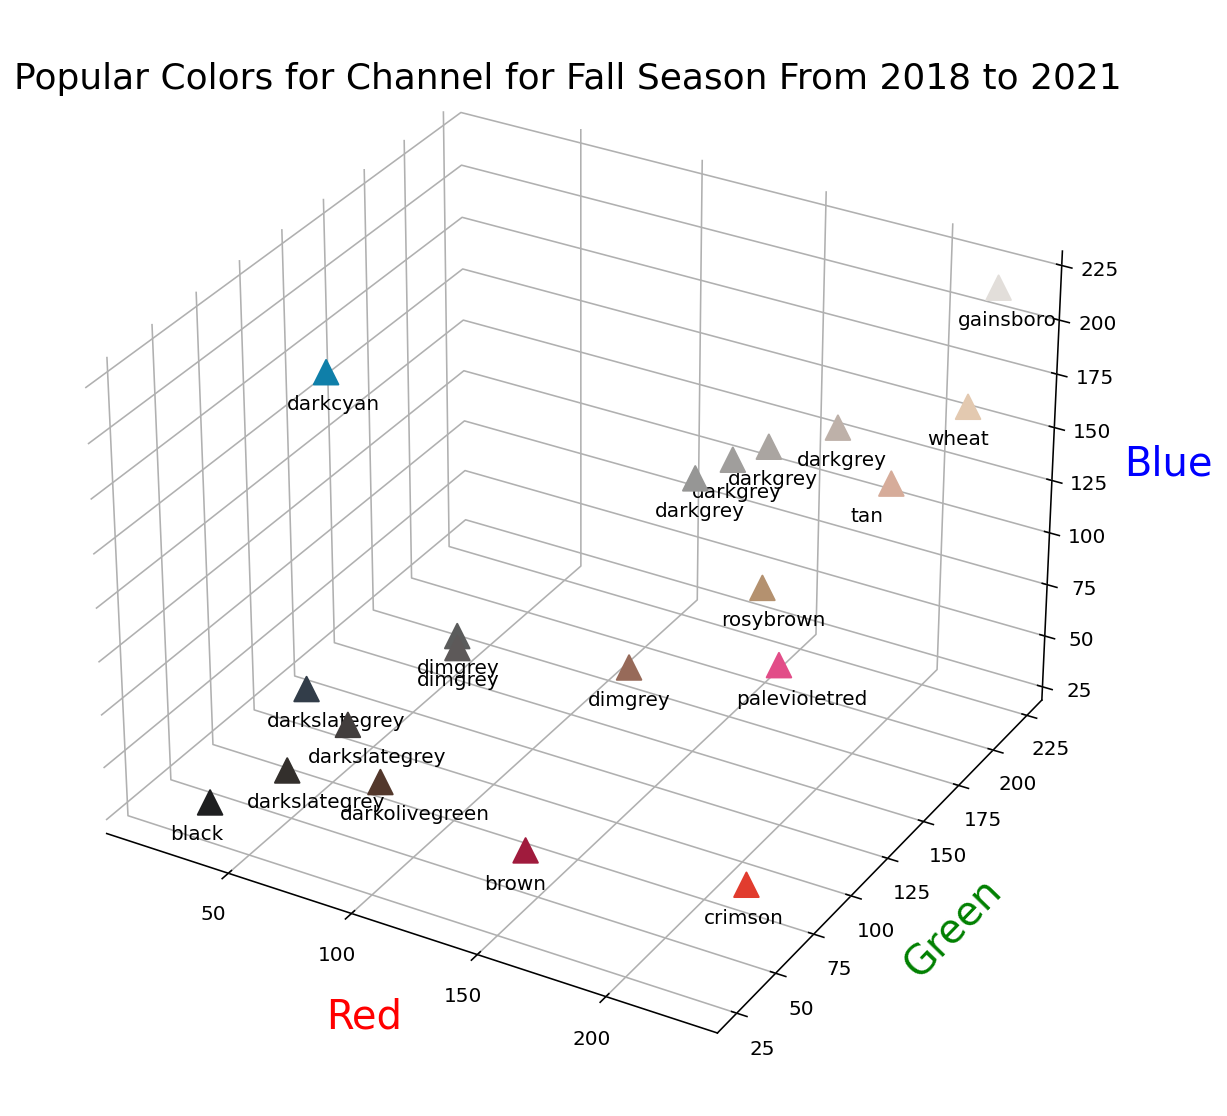

In [47]:
# x=df.loc[df['season']=='fall',['r','g','b','a']]
# centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel for Fall Season From 2018 to 2021',size=18,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))
    
plt.savefig('./plots/popular_colors_channel_fall_2018_2021_3d',transparent=True)

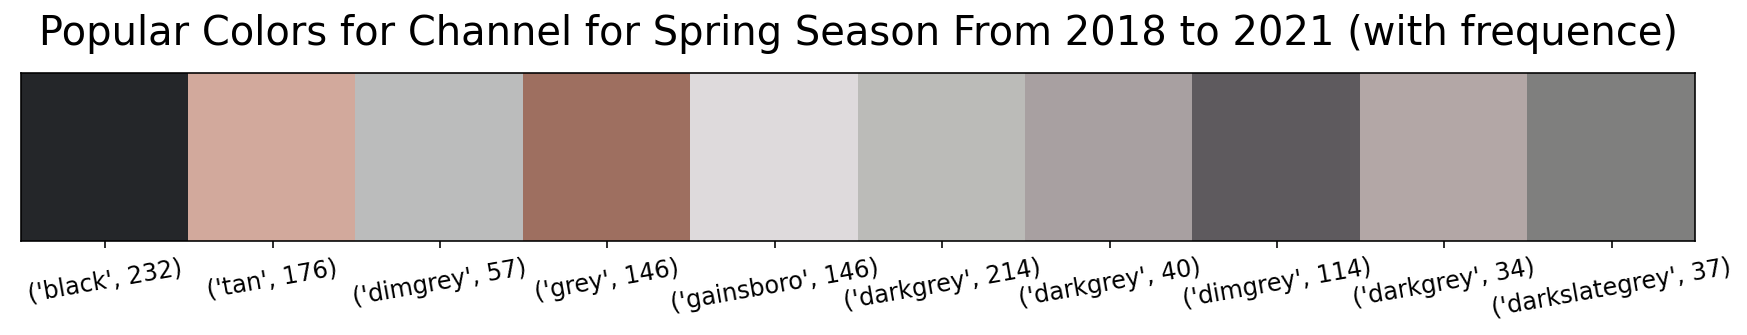

In [48]:
x=df.loc[df['season']=='spring',['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel for Spring Season From 2018 to 2021 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

plt.savefig('./plots/popular_colors_channel_spring_2018_2021',transparent=True)

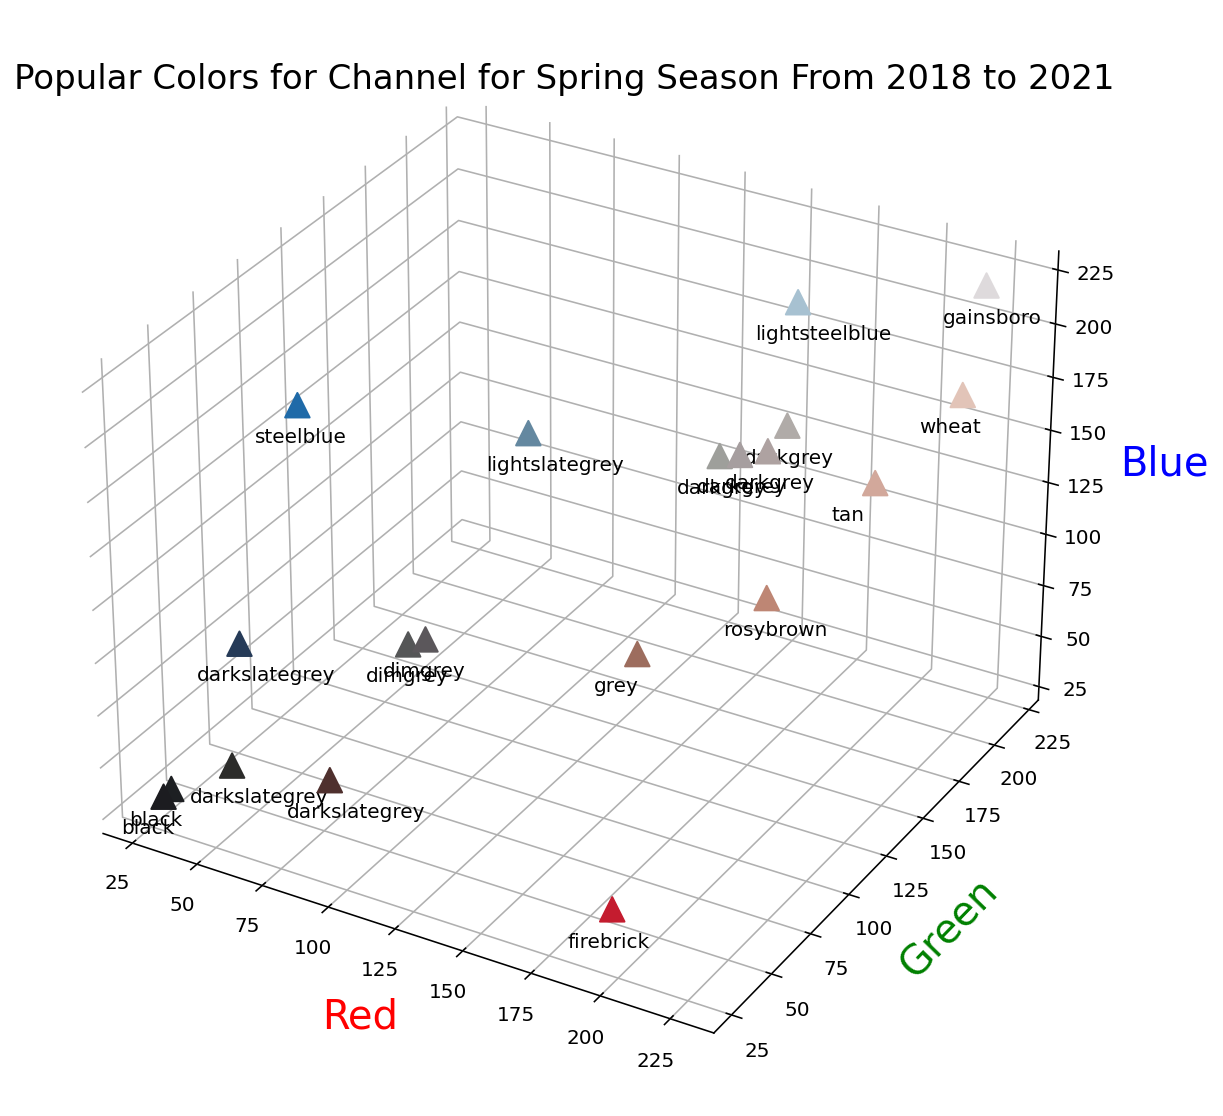

In [49]:
# x=df.loc[df['season']=='spring',['r','g','b','a']]
# centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel for Spring Season From 2018 to 2021',size=17,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))
    
plt.savefig('./plots/popular_colors_channel_spring_2018_2021_3d',transparent=True)

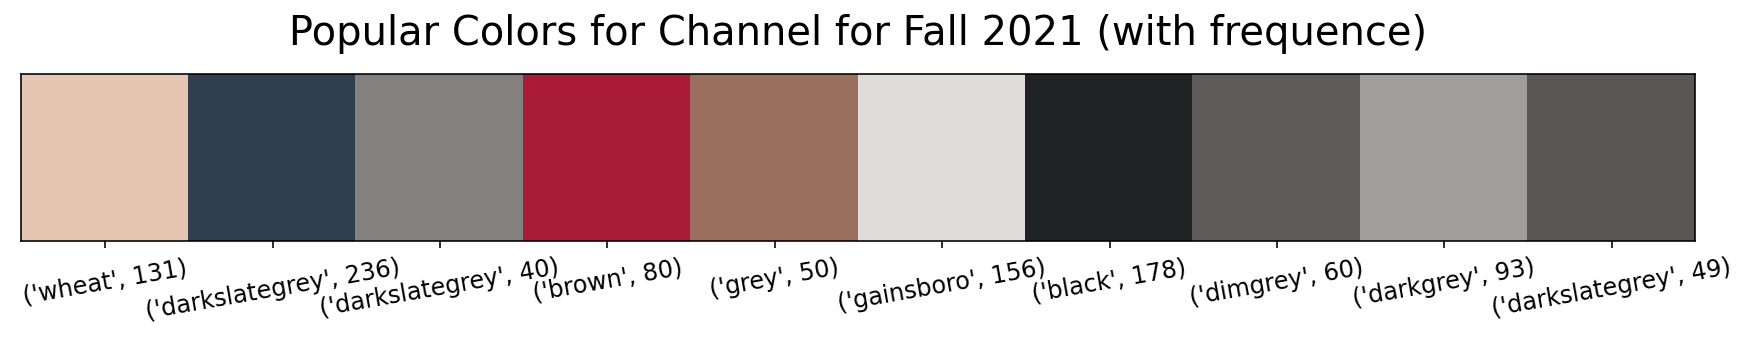

In [50]:
x=df.loc[(df['season']=='fall')|(df['year']==2021),['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])

plt.title('Popular Colors for Channel for Fall 2021 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)

plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);


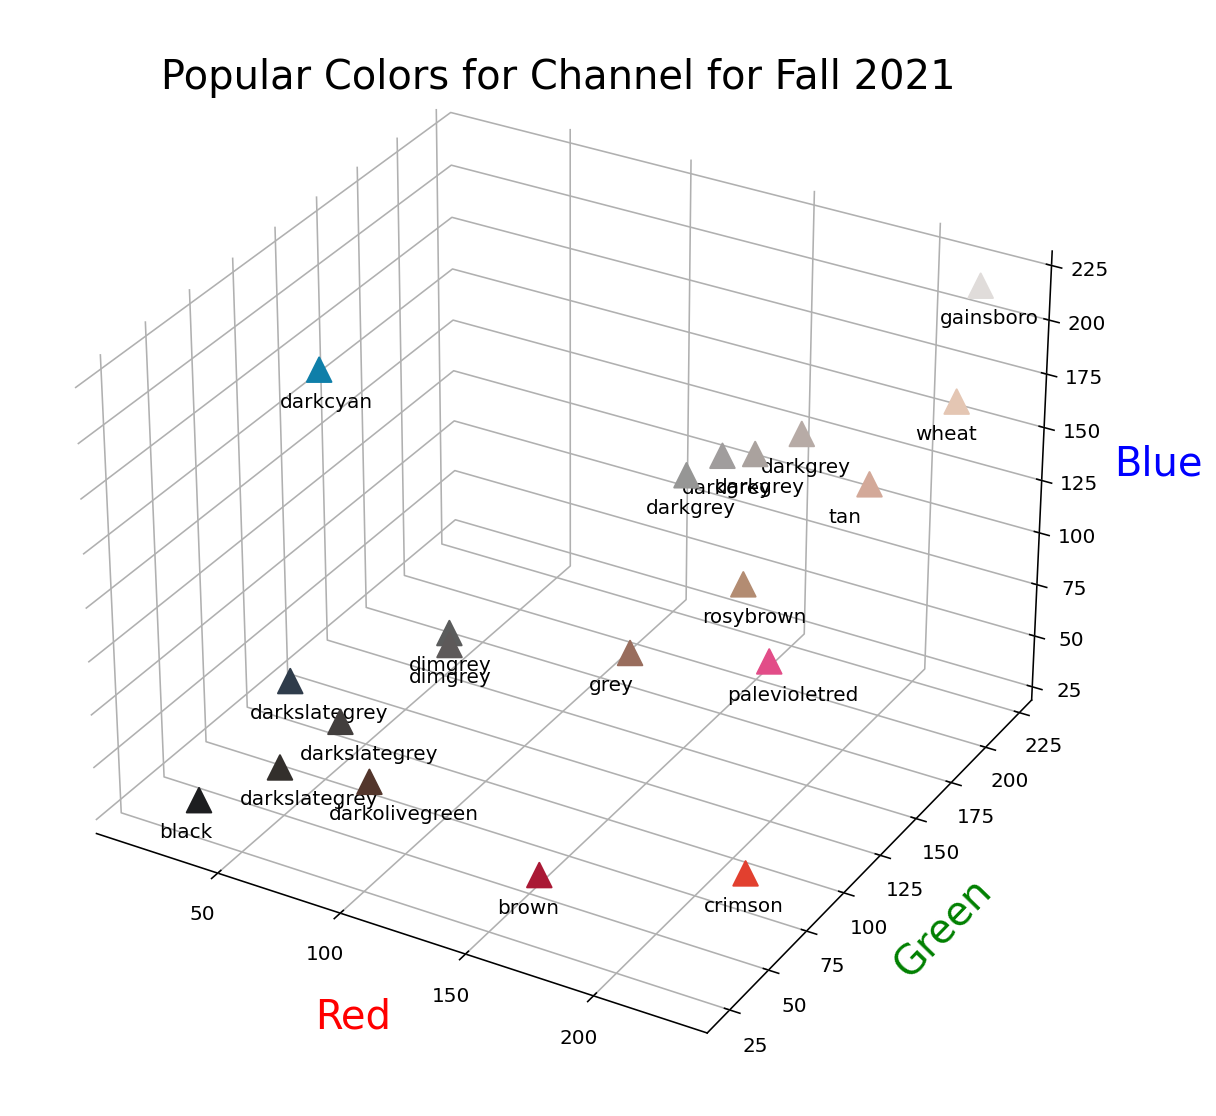

In [51]:
#x=df.loc[(df['season']=='fall')|(df['year']==2021),['r','g','b','a']]
#centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel for Fall 2021',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))

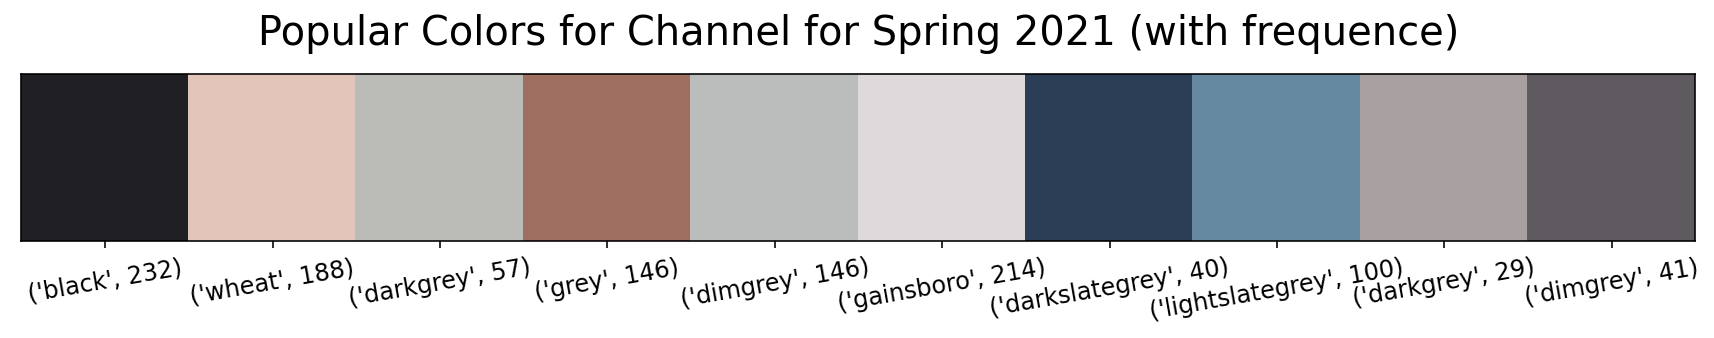

In [52]:
x=df.loc[(df['season']=='spring')|(df['year']==2021),['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel for Spring 2021 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

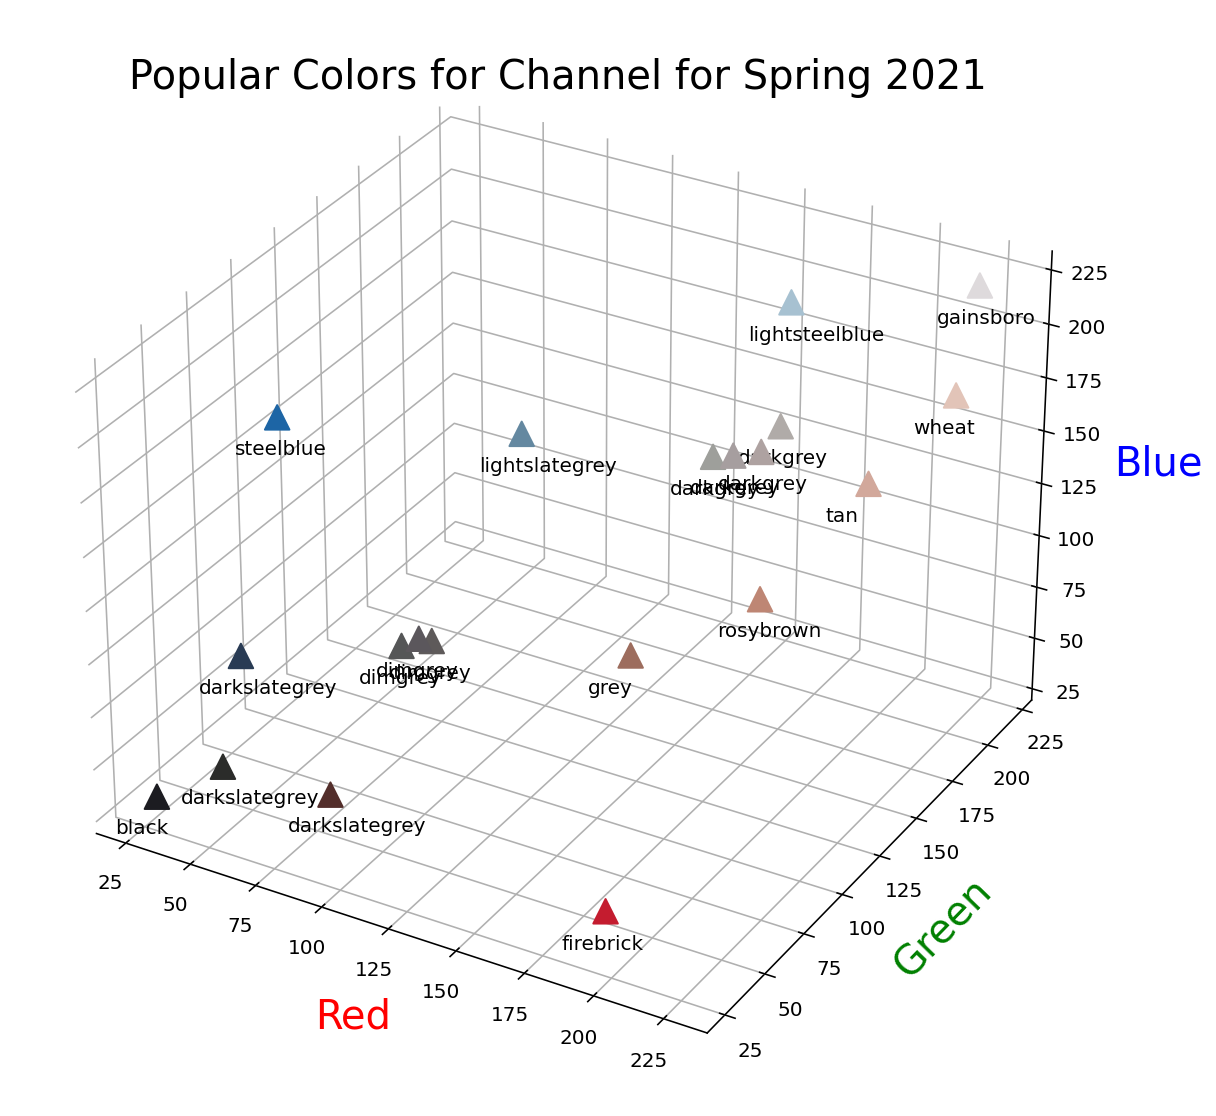

In [53]:
#x=df.loc[(df['season']=='spring')|(df['year']==2021),['r','g','b','a']]
#centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel for Spring 2021',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))

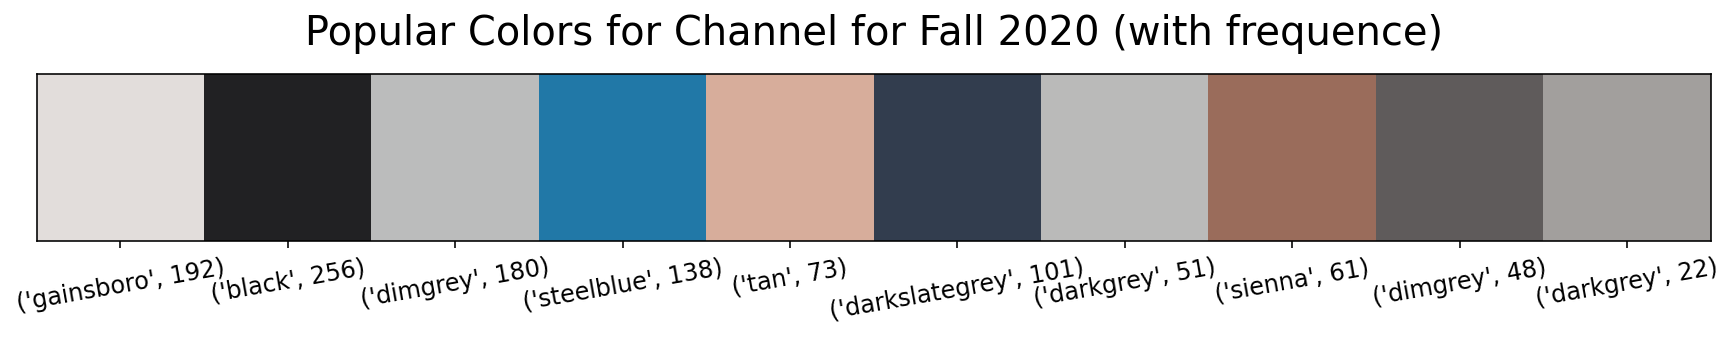

In [54]:
x=df.loc[(df['season']=='fall')|(df['year']==2020),['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])

plt.title('Popular Colors for Channel for Fall 2020 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)

plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

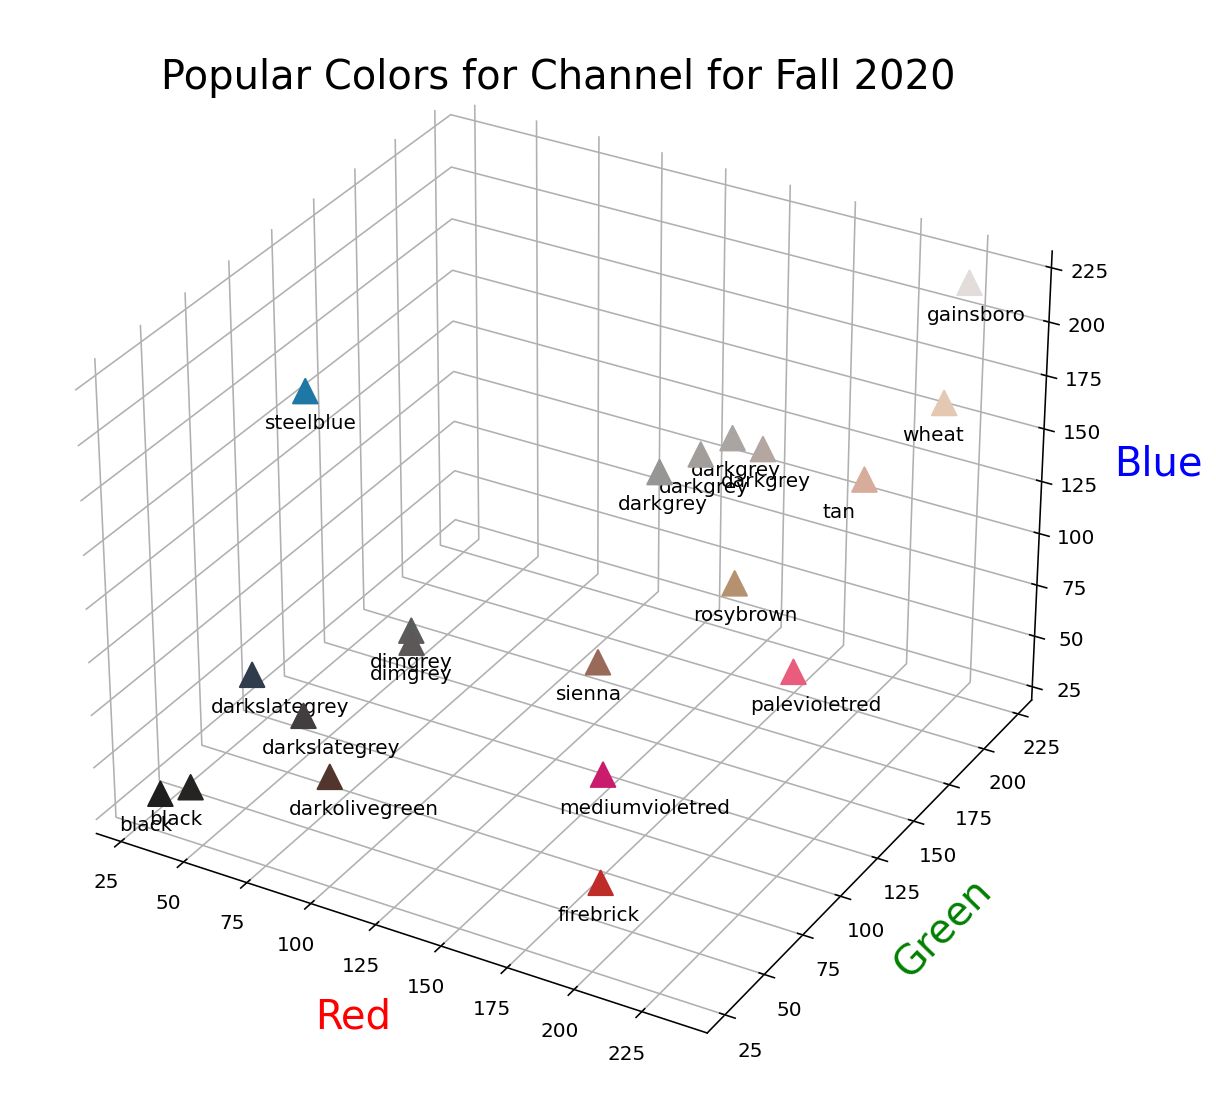

In [55]:
#x=df.loc[(df['season']=='fall')|(df['year']==2020),['r','g','b','a']]
#centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel for Fall 2020',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))

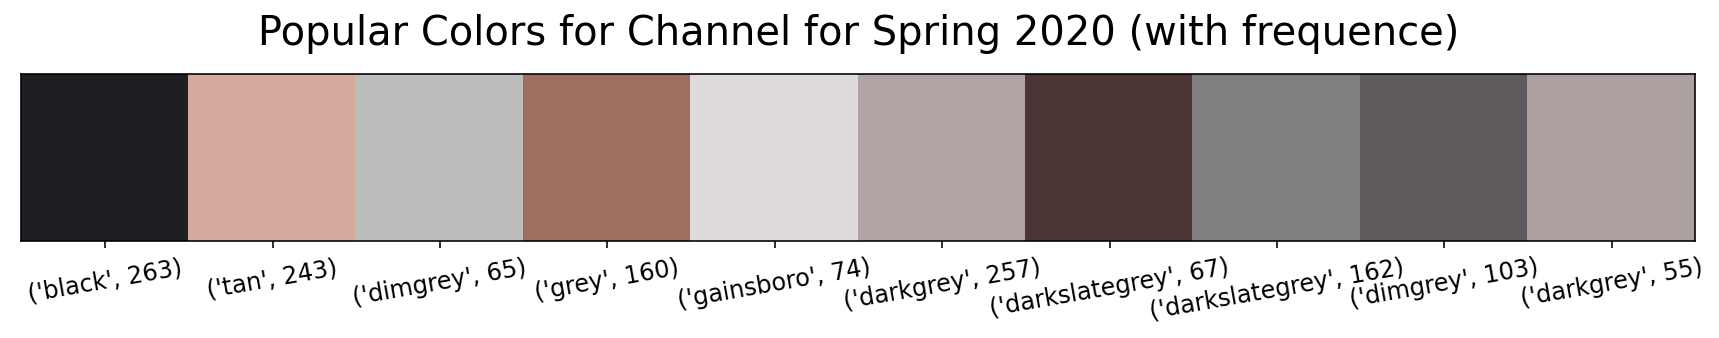

In [56]:
x=df.loc[(df['season']=='spring')|(df['year']==2020),['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel for Spring 2020 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)

plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

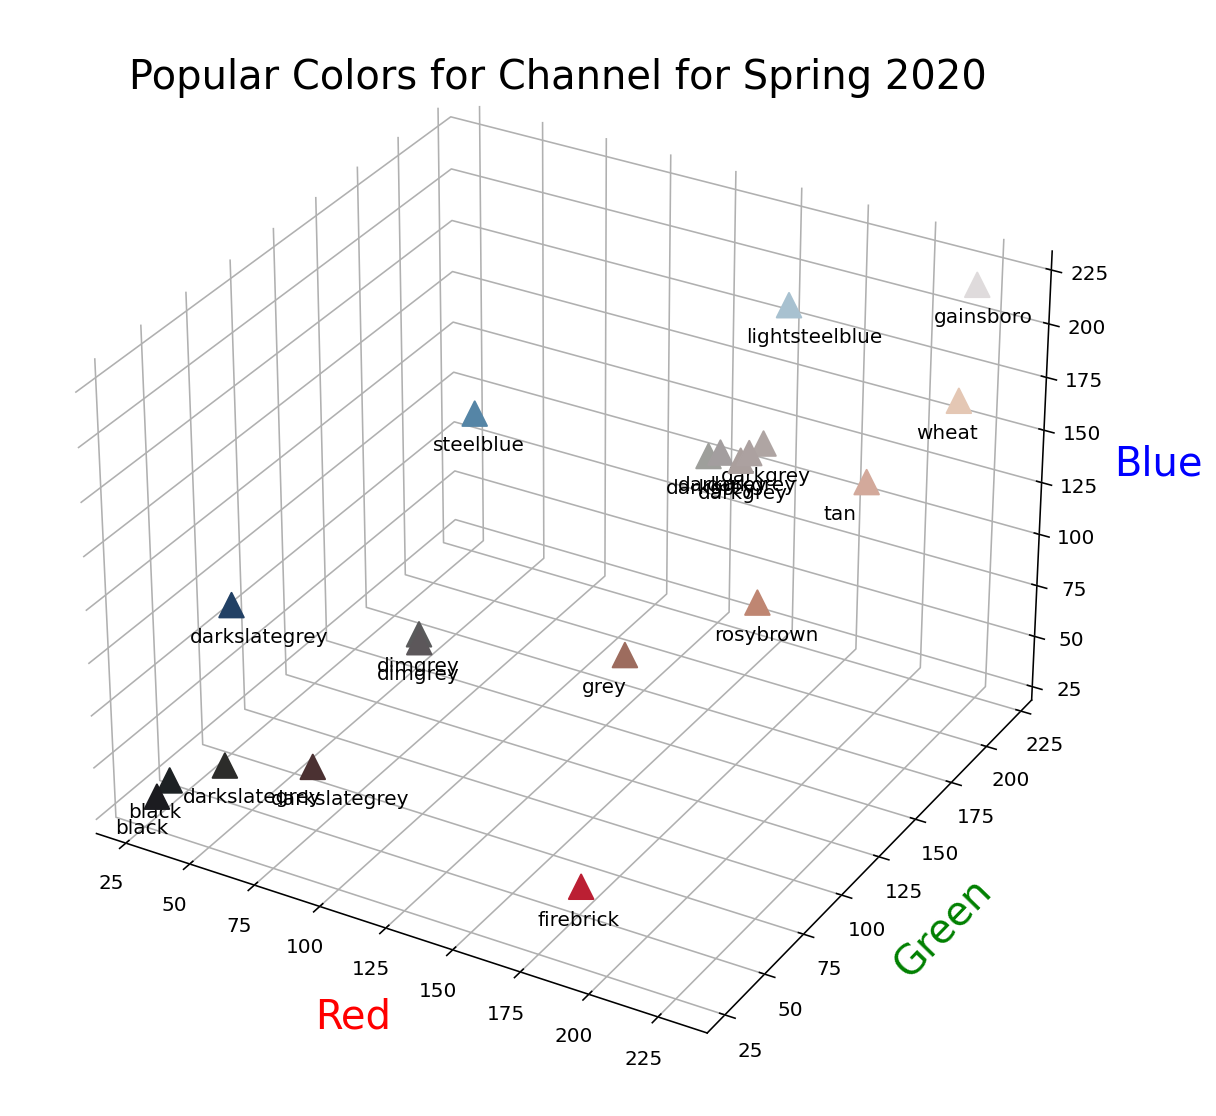

In [57]:
#x=df.loc[(df['season']=='spring')|(df['year']==2020),['r','g','b','a']]
#centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel for Spring 2020',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))

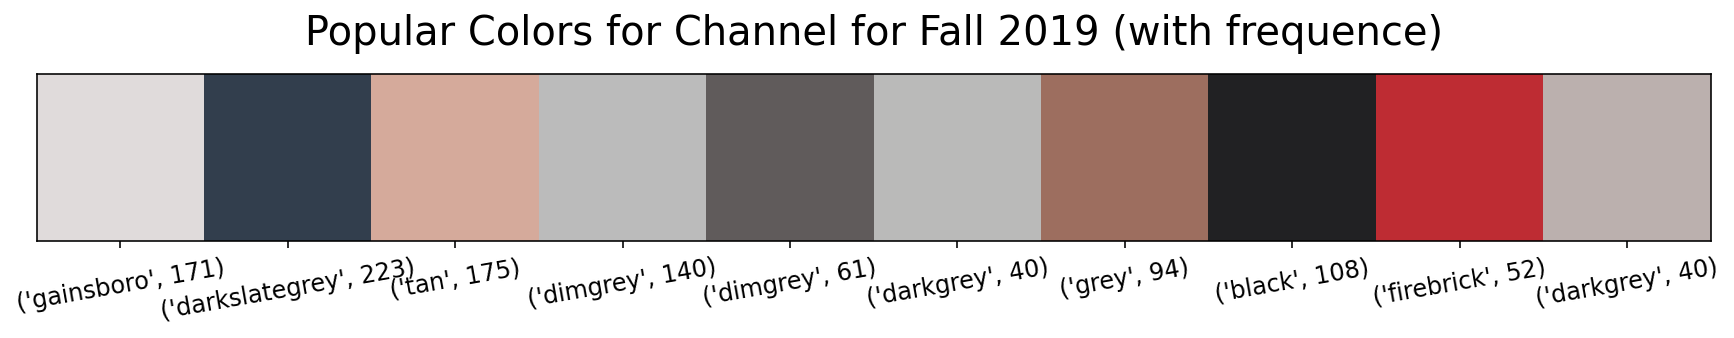

In [58]:
x=df.loc[(df['season']=='fall')|(df['year']==2019),['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel for Fall 2019 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

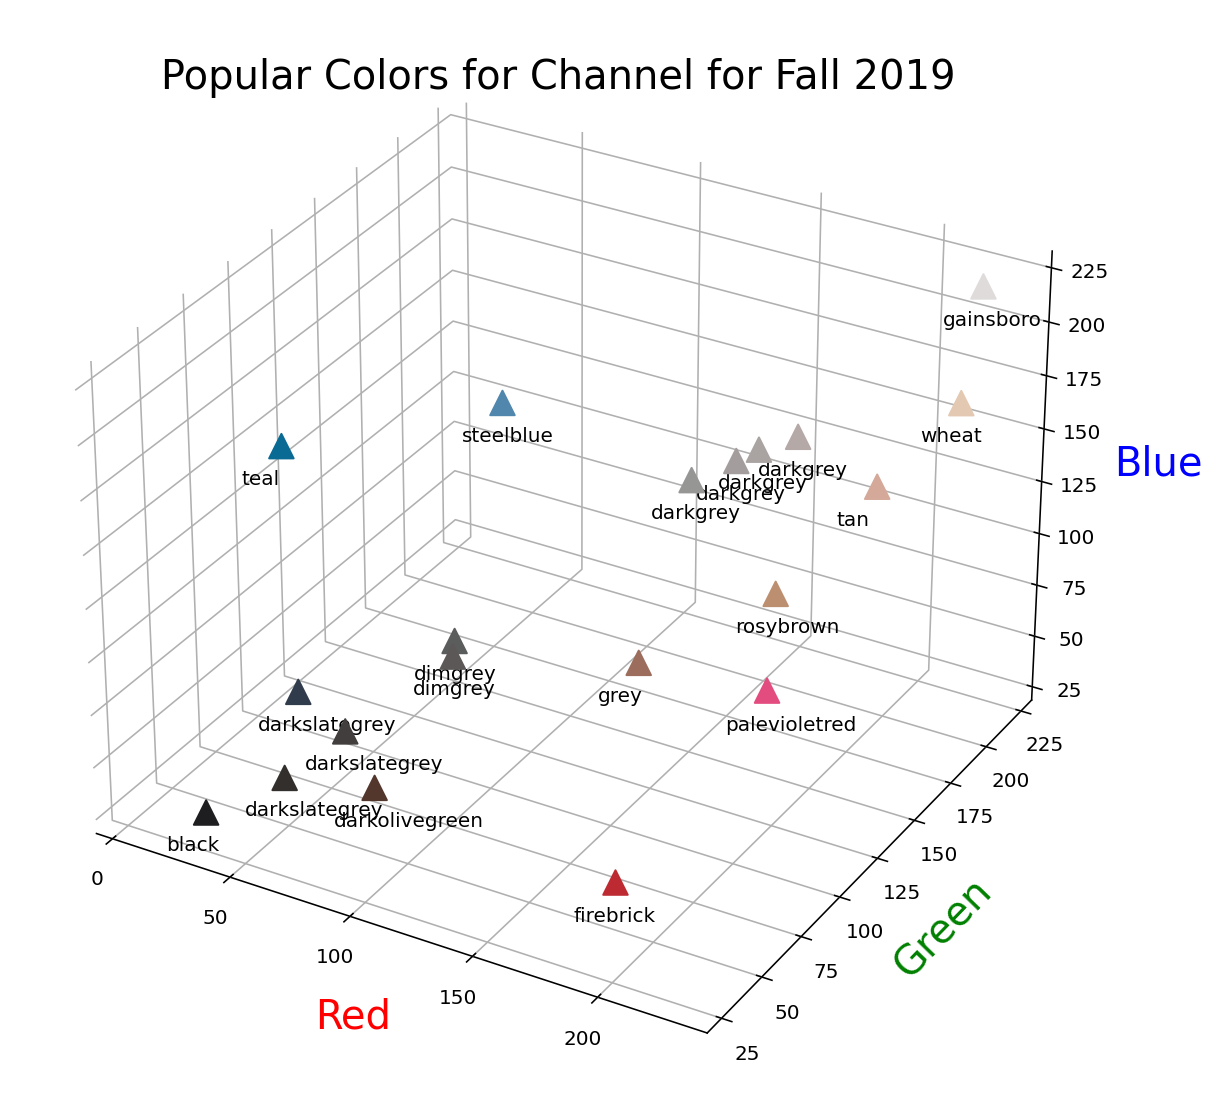

In [59]:
#x=df.loc[(df['season']=='fall')|(df['year']==2019),['r','g','b','a']]
#centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel for Fall 2019',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))

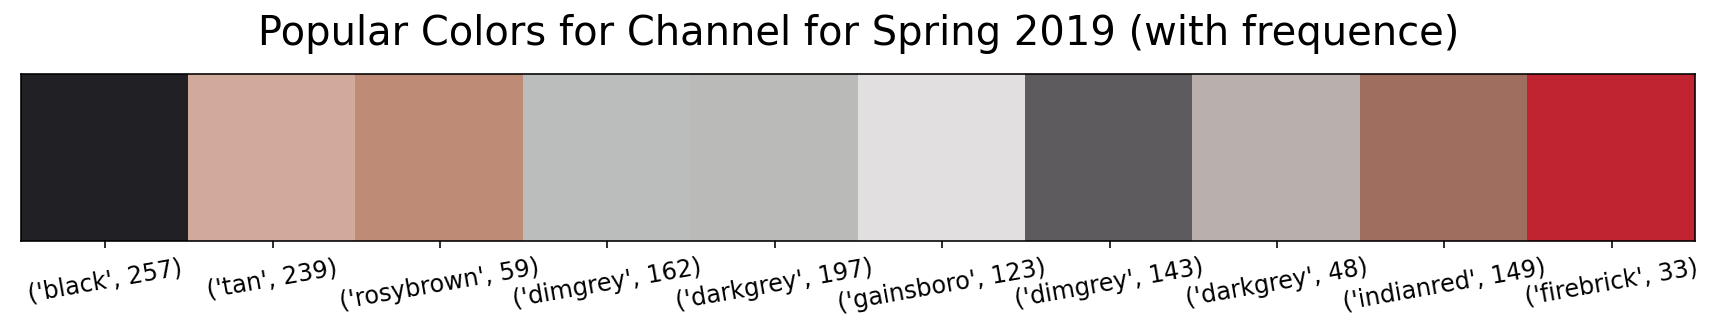

In [60]:
x=df.loc[(df['season']=='spring')|(df['year']==2019),['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel for Spring 2019 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)

plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

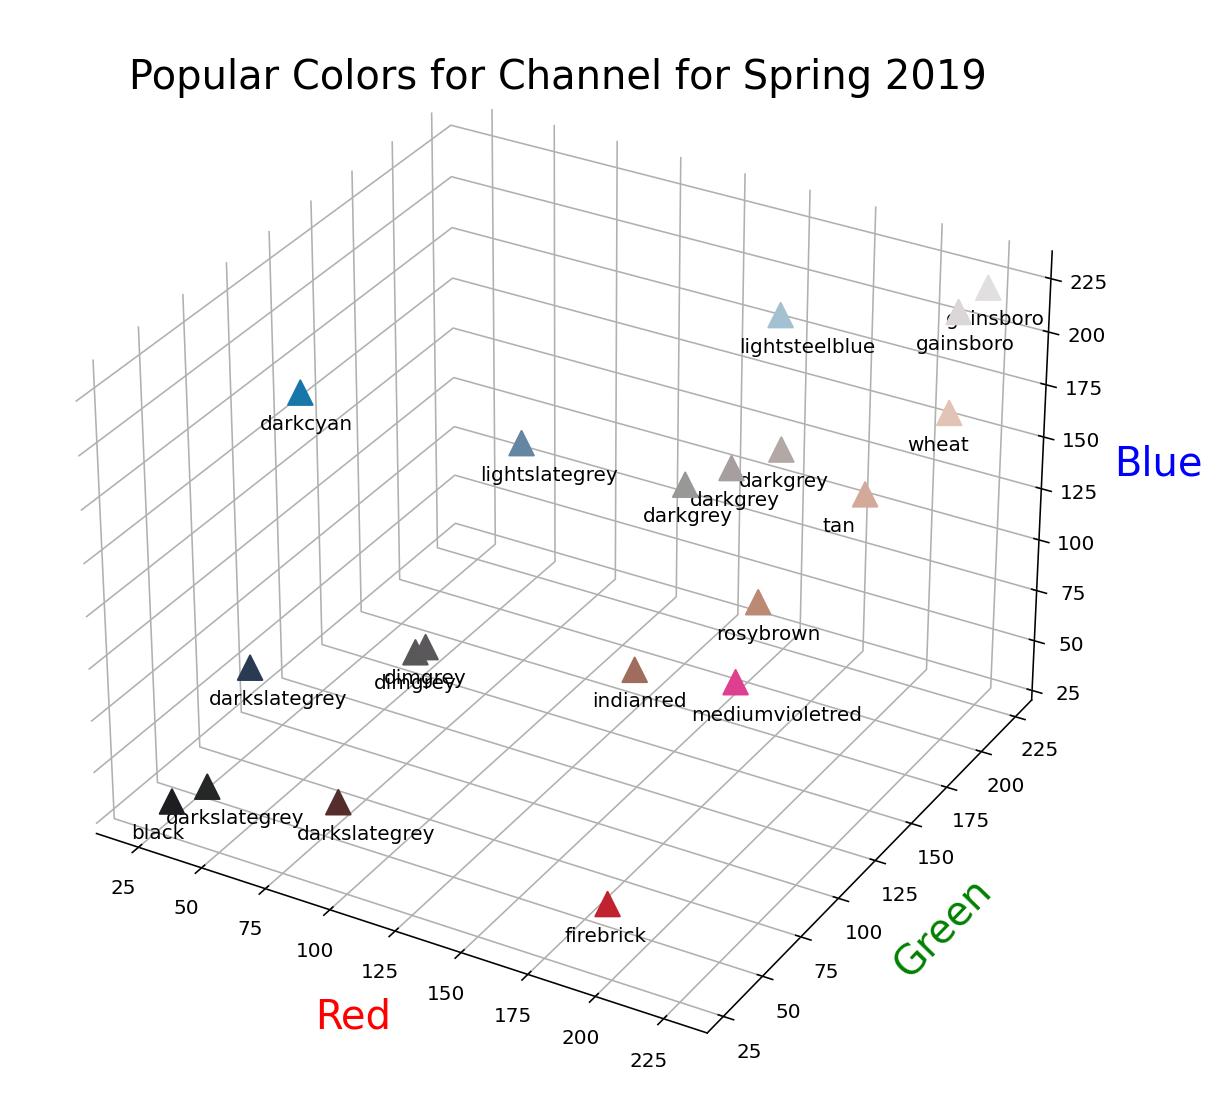

In [61]:
#x=df.loc[(df['season']=='spring')|(df['year']==2019),['r','g','b','a']]
#centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel for Spring 2019',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))

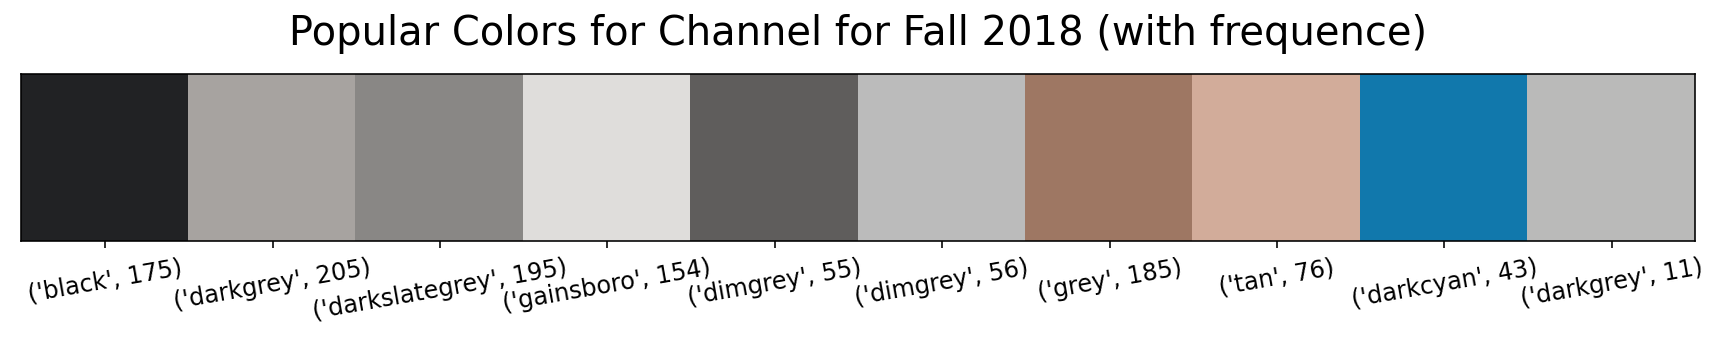

In [62]:
x=df.loc[(df['season']=='fall')|(df['year']==2018),['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel for Fall 2018 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

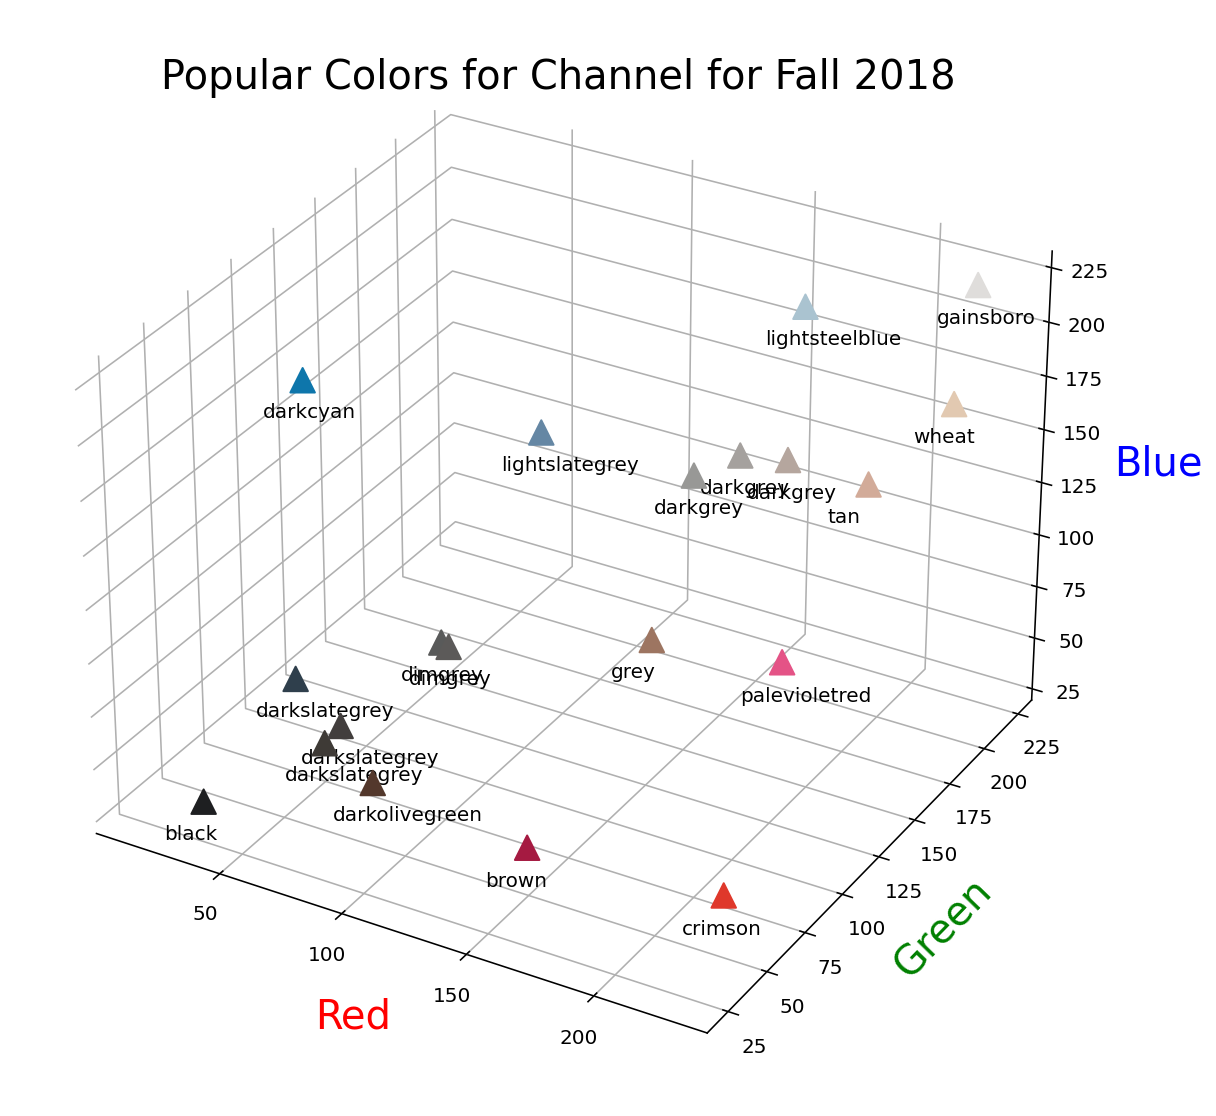

In [63]:
#x=df.loc[(df['season']=='fall')|(df['year']==2018),['r','g','b','a']]
#centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel for Fall 2018',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20)
axis.zaxis.label.set_color('blue')
axis.xaxis.labelpad=10
axis.yaxis.labelpad=10
axis.zaxis.labelpad=15

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))

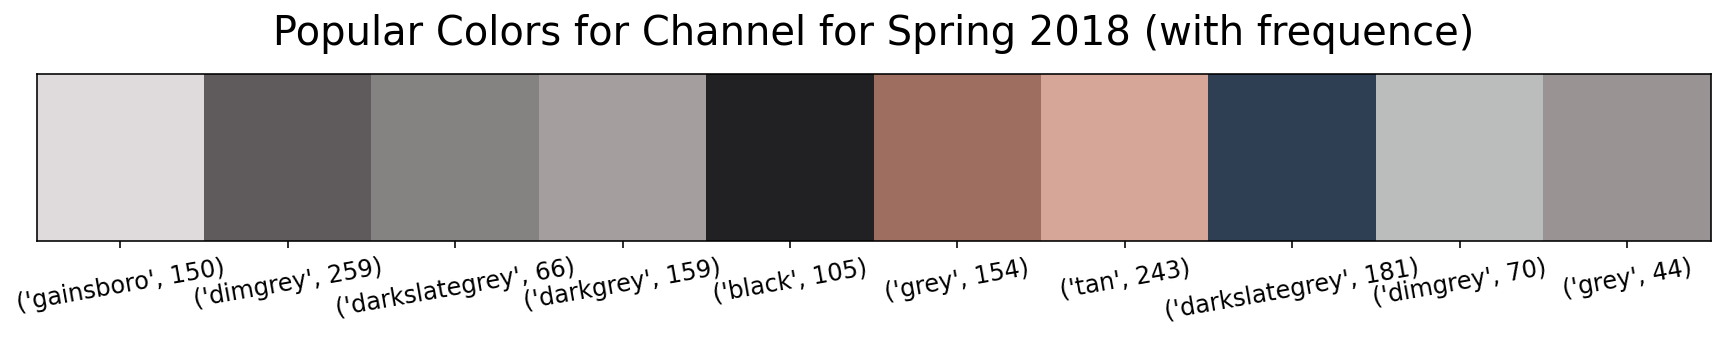

In [64]:
x=df.loc[(df['season']=='spring')|(df['year']==2018),['r','g','b','a']]
centroids,color_name_k,color_frequence=popular_color(x,20)

plt.figure(figsize=(15,8))
a=plt.imshow([centroids[:10]])
plt.title('Popular Colors for Channel for Spring 2018 (with frequence)',size=20,y=1.1)
a.axes.get_yaxis().set_visible(False)
plt.xticks(range(0,int((len(color_name_k)/2))),
           [i for i in zip(color_name_k[:10],list(color_frequence)[:10])],size=12,rotation=10);

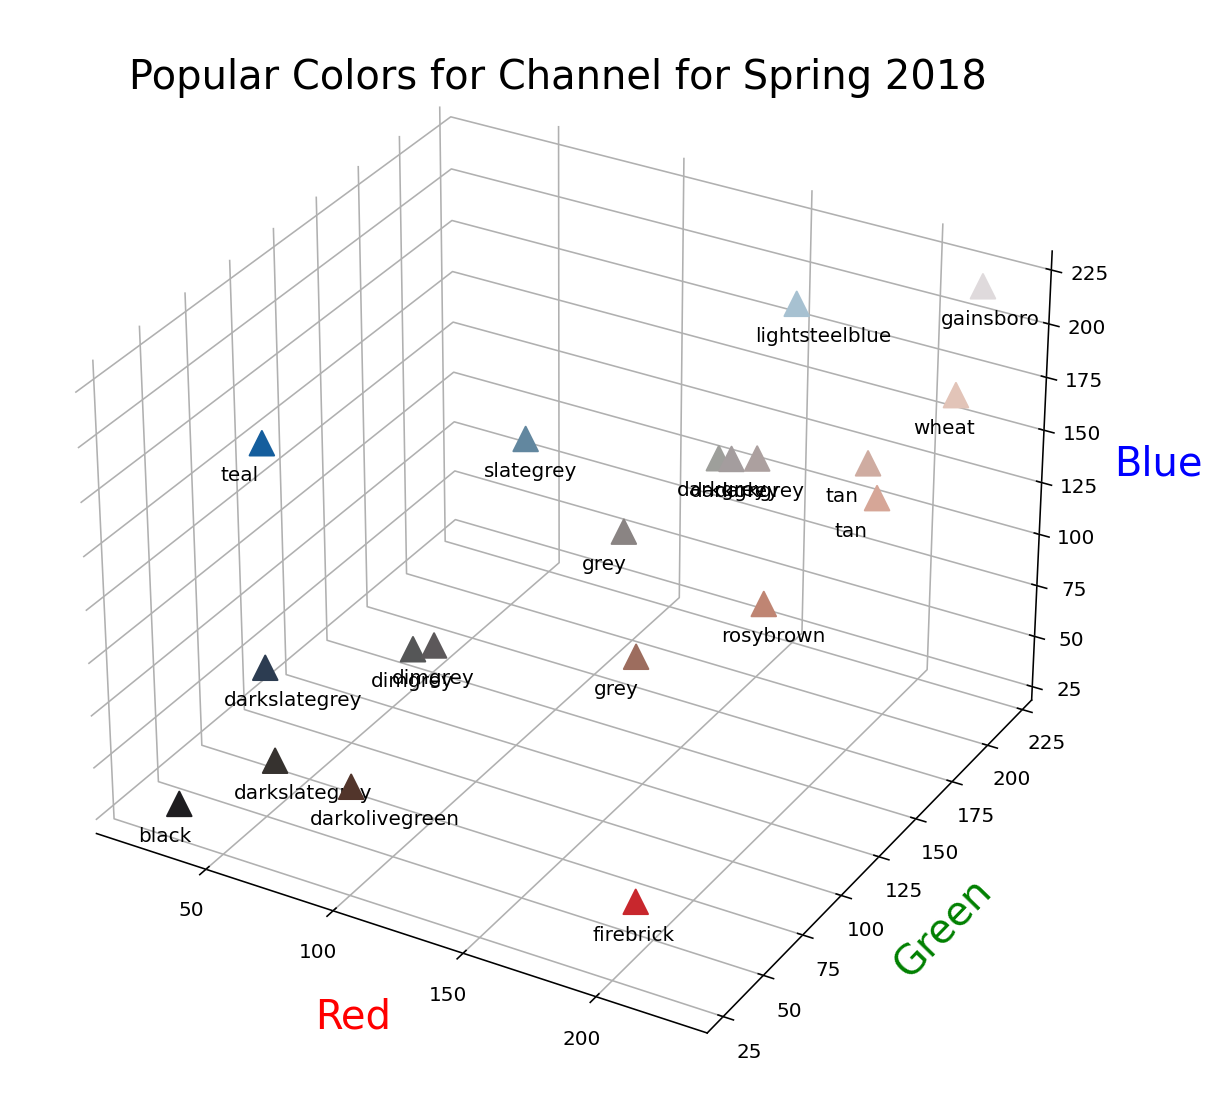

In [65]:
#x=df.loc[(df['season']=='spring')|(df['year']==2018),['r','g','b','a']]
#centroids,color_name_k,color_frequence=popular_color(x,20)

centroids_df=pd.DataFrame(centroids)

fig=plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1,projection='3d')

axis.scatter(centroids_df[0],centroids_df[1],centroids_df[2],
            c=centroids/255.0,marker='^',alpha=1,s=150)

plt.title('Popular Colors for Channel for Spring 2018',size=20,y=1)
axis.set_xlabel("Red",size=20)
axis.xaxis.labelpad=10
axis.xaxis.label.set_color('red')
axis.set_ylabel("Green",size=20)
axis.yaxis.labelpad=10
axis.yaxis.label.set_color('green')
axis.set_zlabel("Blue",size=20,linespacing=3.4)
axis.zaxis.labelpad=15
axis.zaxis.label.set_color('blue')

#change the background to white
axis.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
axis.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for i in range(len(centroids_df)):
    x,y,z=centroids_df.iloc[i][0],centroids_df.iloc[i][1],centroids_df.iloc[i][2]
    axis.scatter(x,y,z,alpha=0)
    axis.text(x-10,y-10,z-15,'{0}'.format(color_name_k[i]))